## Importing the Libraries

In [57]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import PrecisionRecallDisplay
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Data Exploration

In [58]:
#Reading the dataset
data = pd.read_csv('files\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [59]:
#Checking the shape of the dataset
print(data.shape)

(1470, 35)


In [60]:
#Checking the data types of the columns
print(data.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [61]:
#Getting the information of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [62]:
#Checking the first few rows of the dataset
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [63]:
#Getting the summary of the dataset
data.describe().transpose()

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [64]:
#Getting the count of missing values in the dataset
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [65]:
#Checking the dataset for duplicates
print('Number of duplicates: ', data.duplicated().sum())

Number of duplicates:  0


In [66]:
#Checking the unique values in the dataset
print(data.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [67]:
#Converting the column EmployeeNumber to the index, as it is a unique identifier
data.set_index('EmployeeNumber', inplace=True)

In [68]:
#Getting the unique values for each column
for col in data.columns:
    print(col, data[col].unique())

Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

## Data Visualization

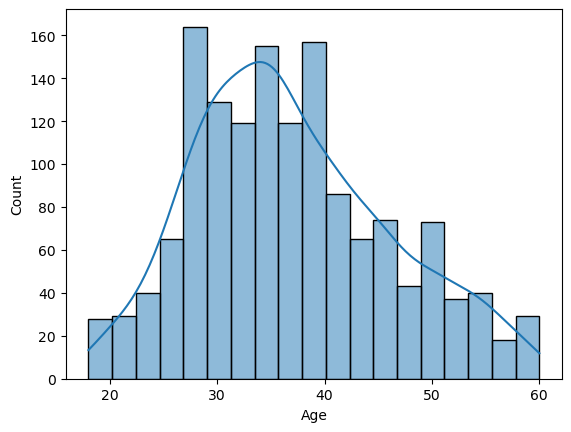

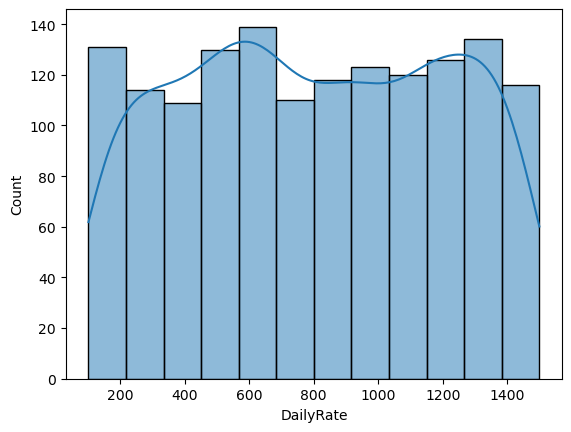

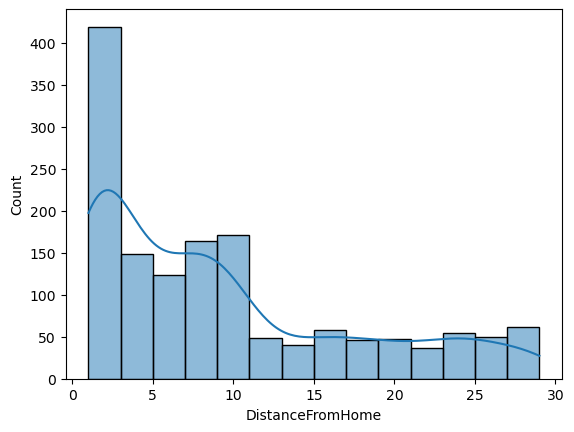

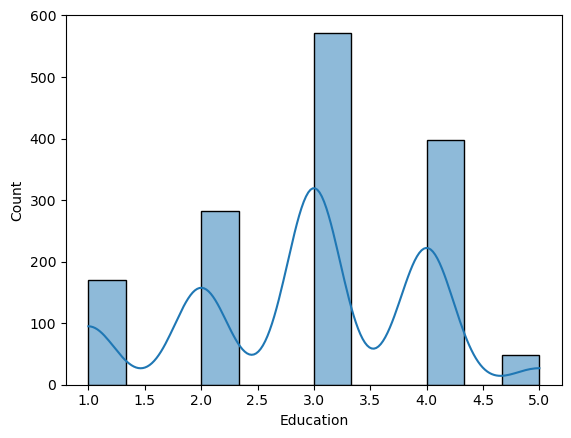

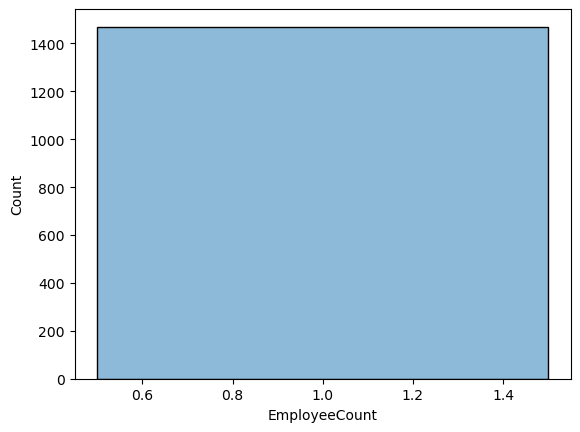

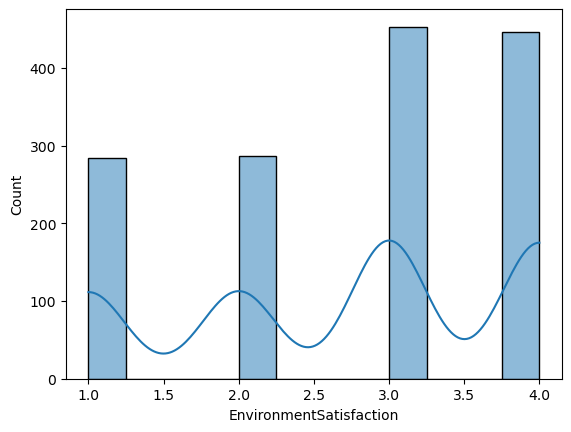

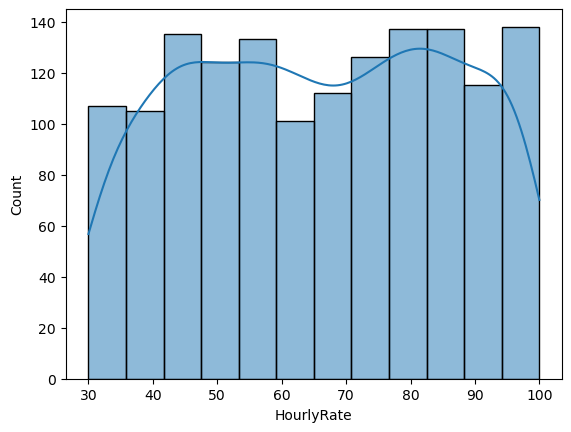

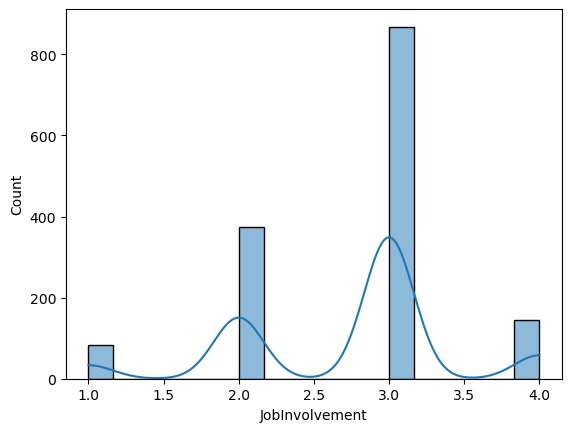

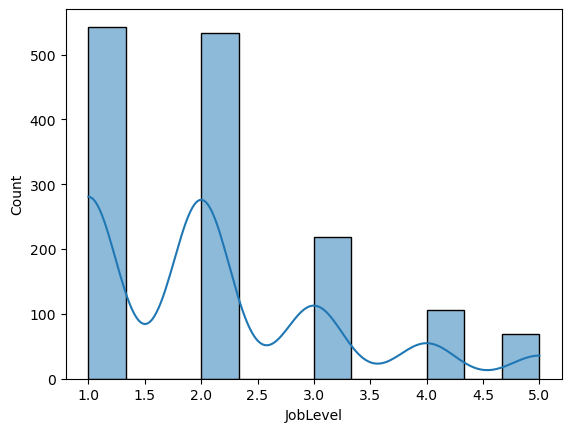

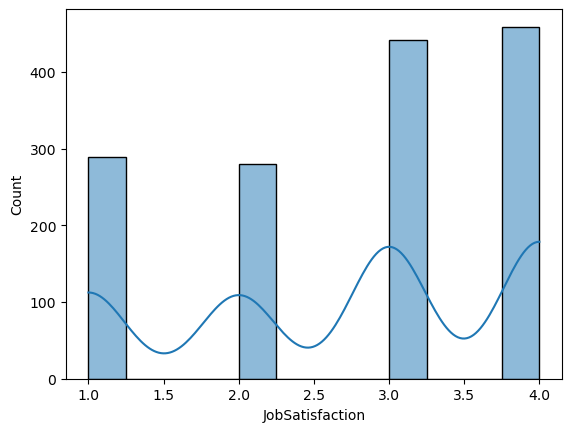

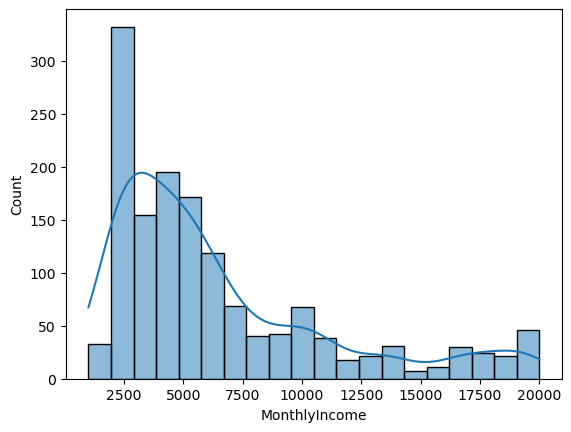

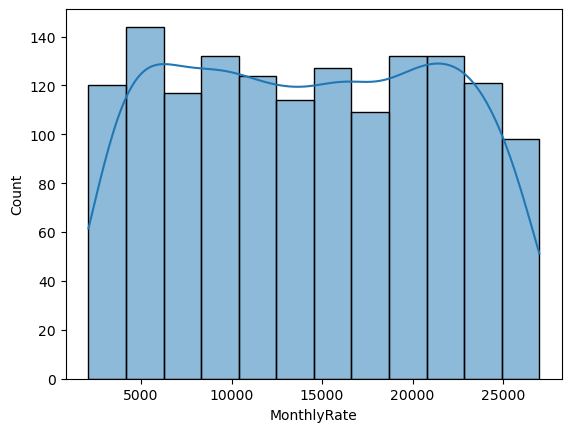

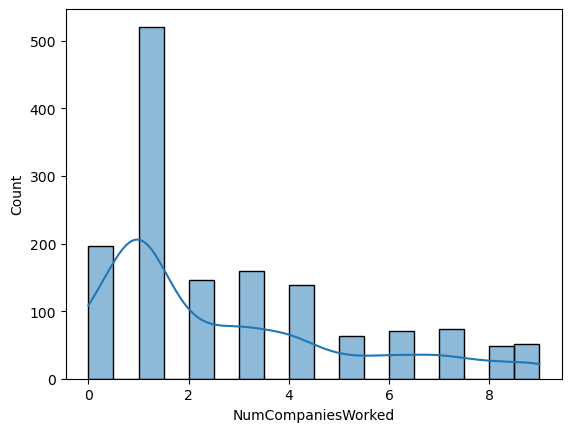

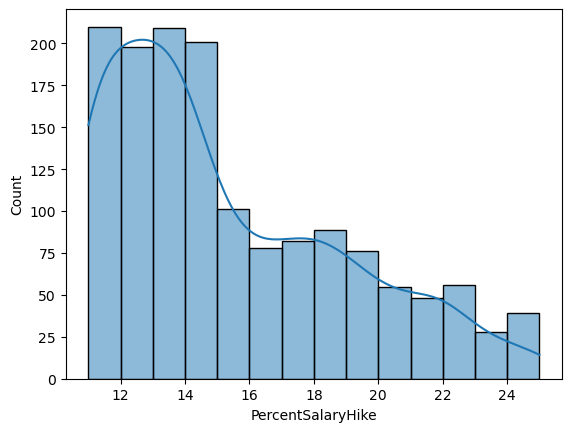

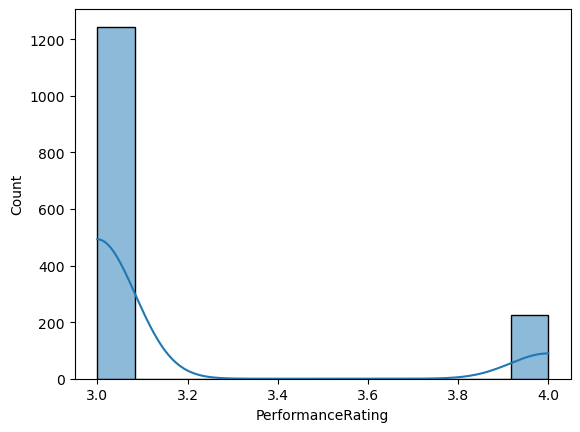

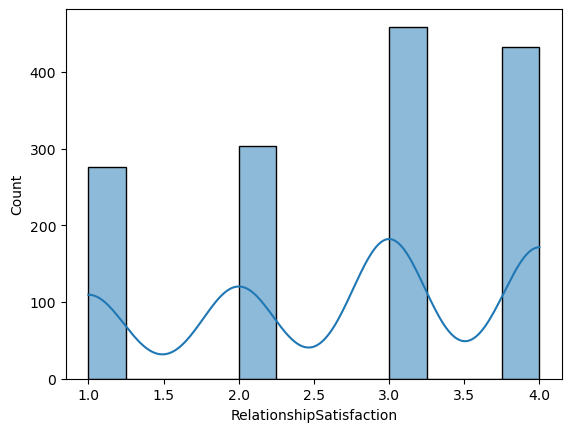

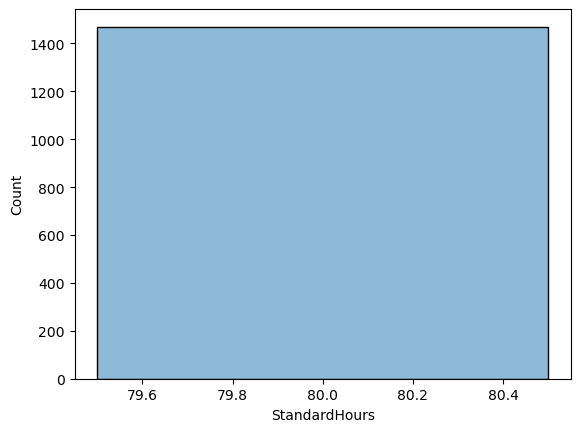

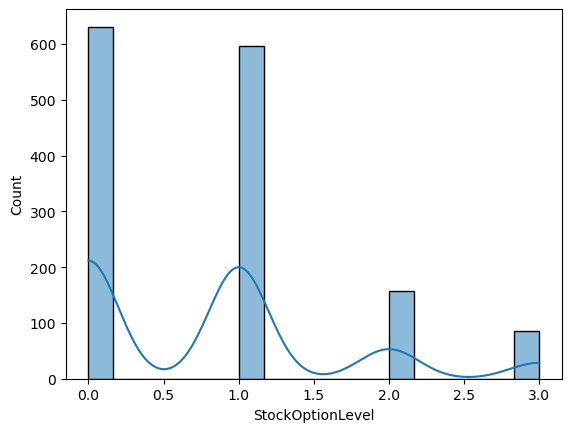

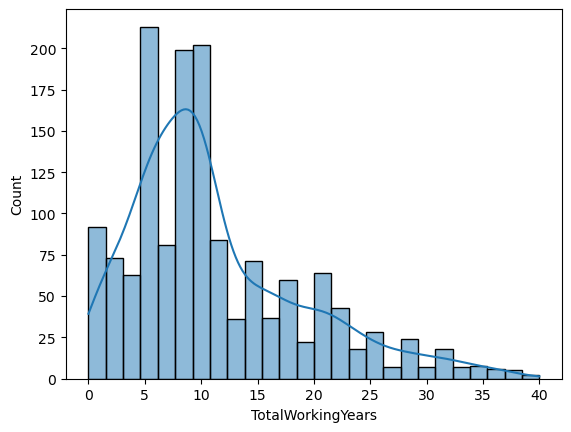

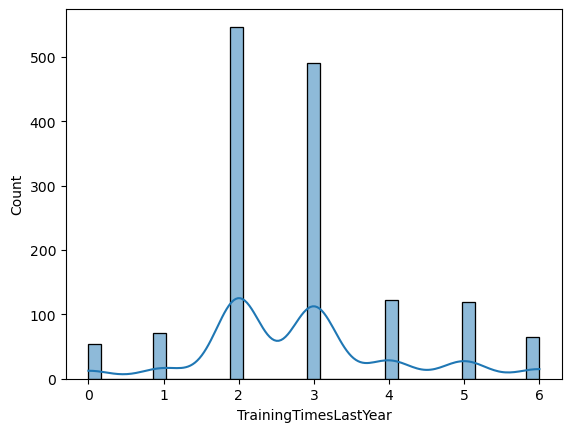

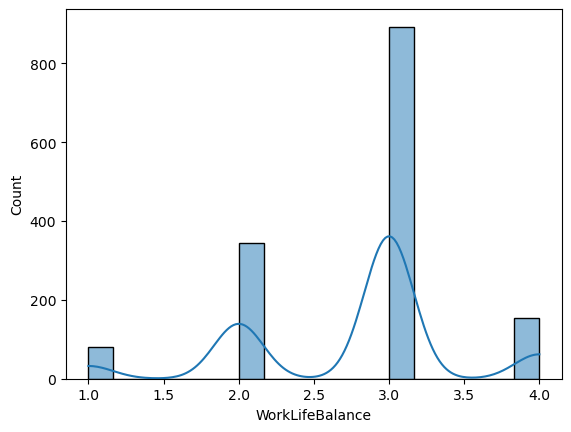

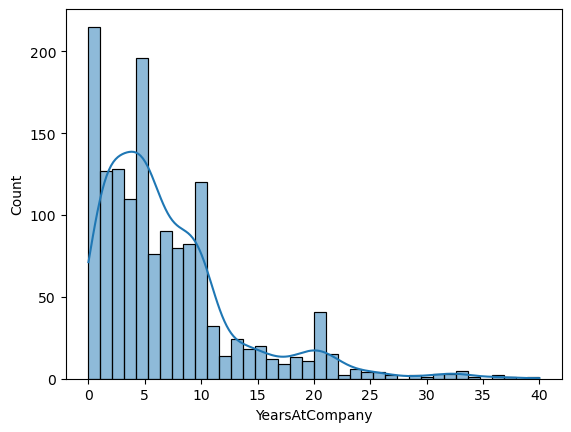

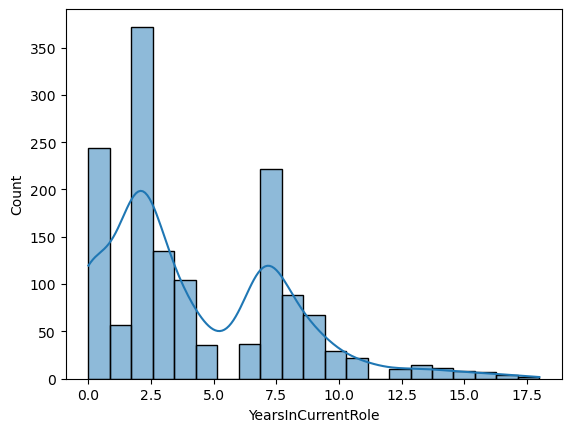

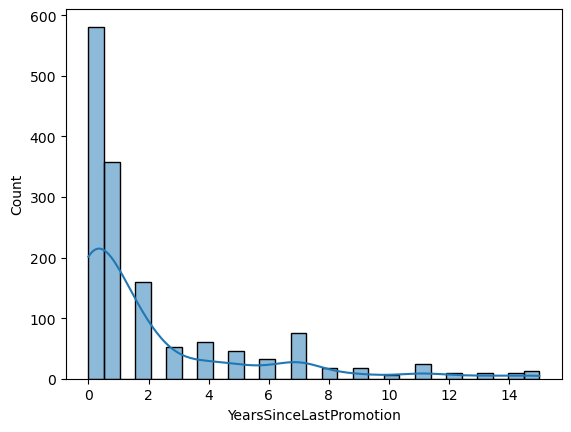

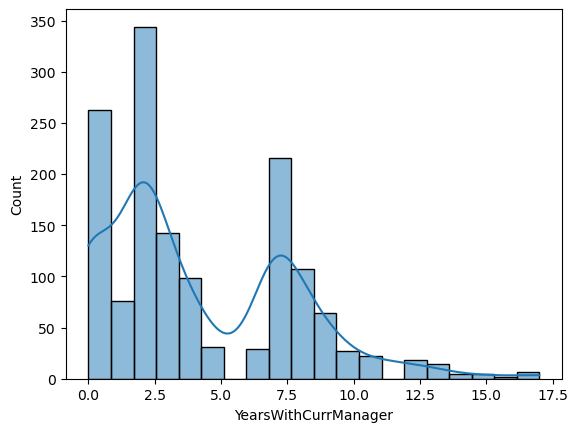

In [69]:
#Plotting the distribution of the numerical columns
for col in data.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(data[col], kde=True)

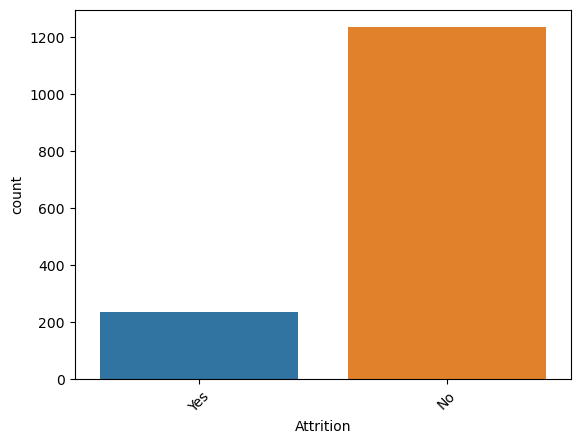

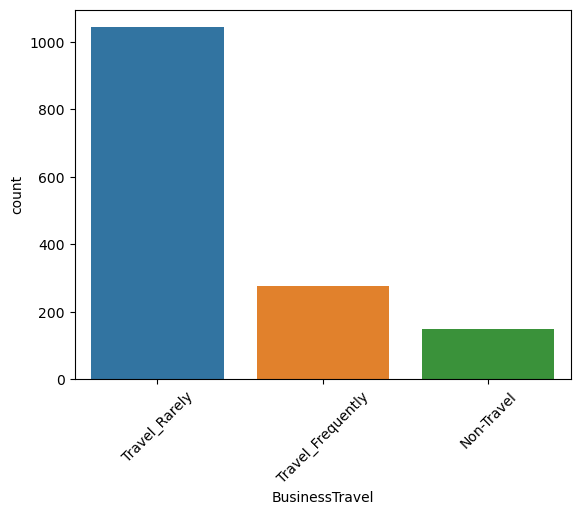

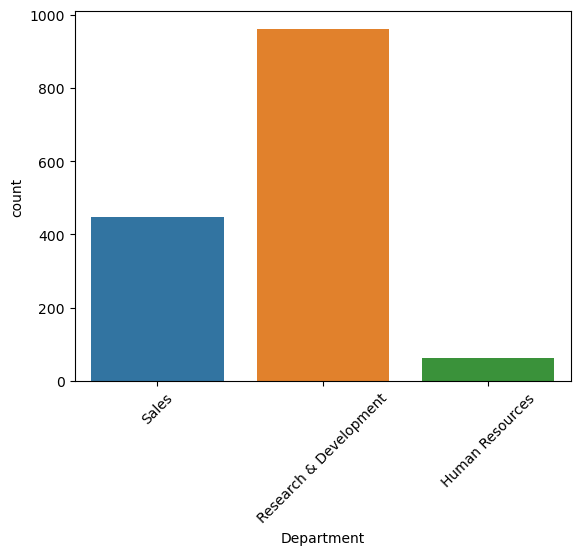

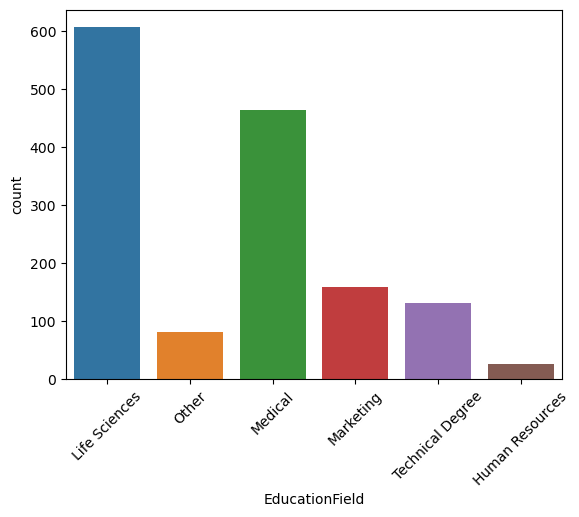

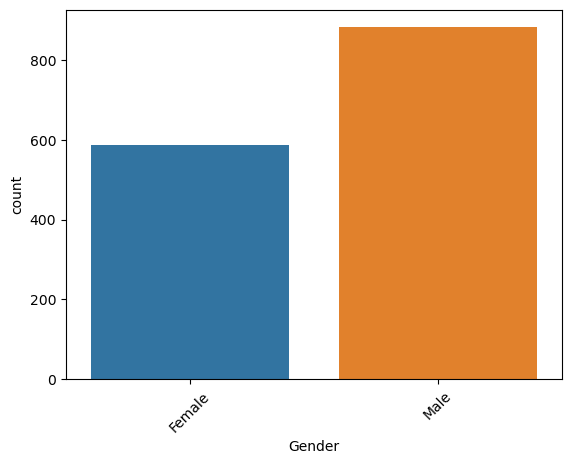

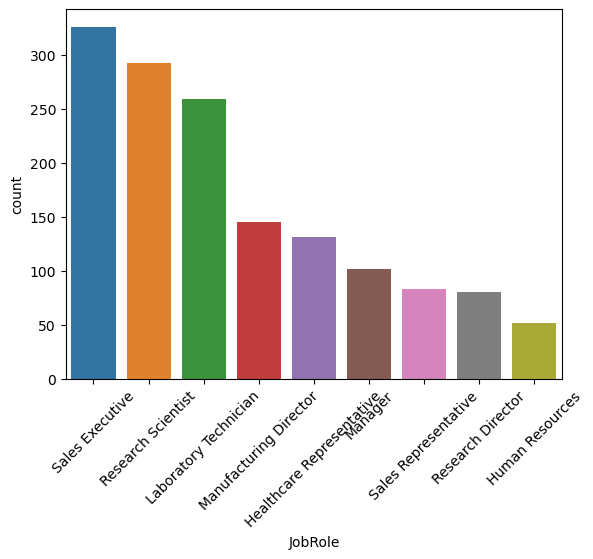

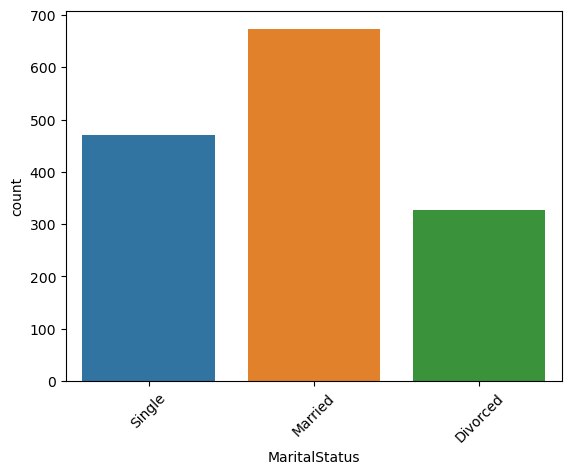

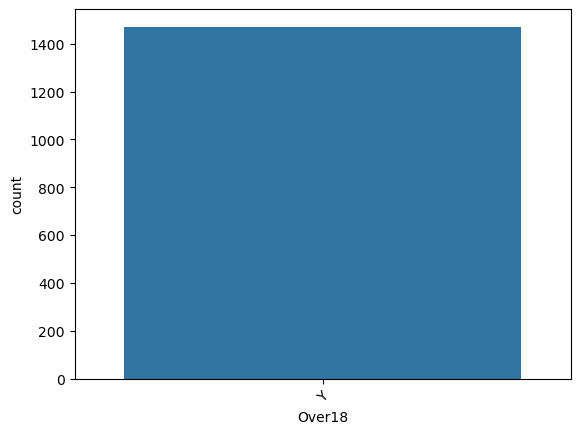

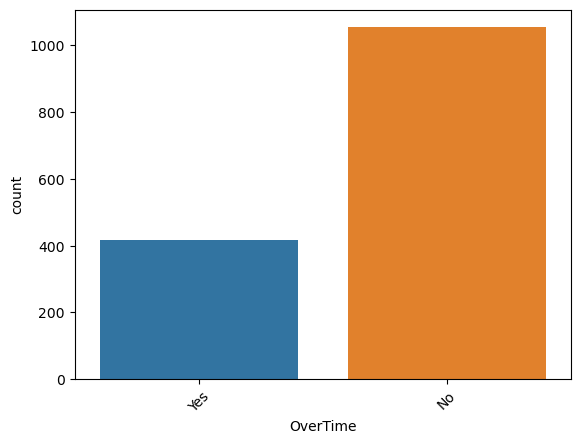

In [70]:
#Plotting the categorical columns
for col in data.select_dtypes(include=object).columns:
    plt.figure()
    plt.xticks(rotation=45)
    sns.countplot(data=data, x=col)

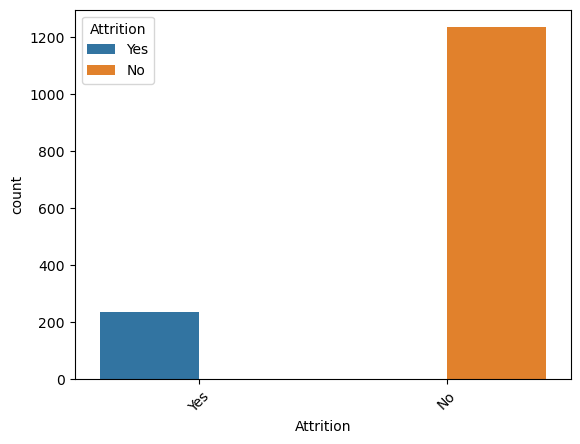

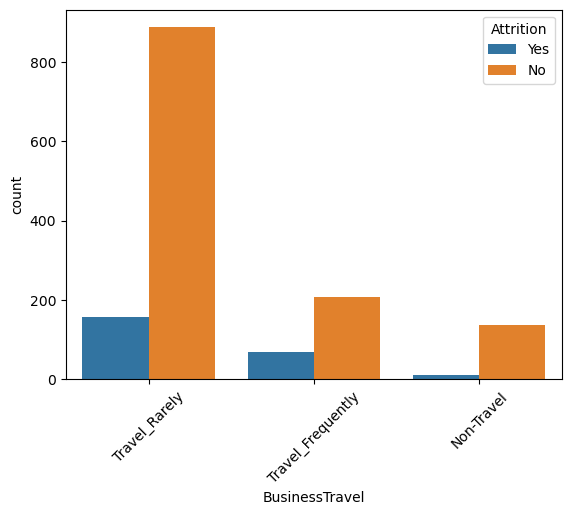

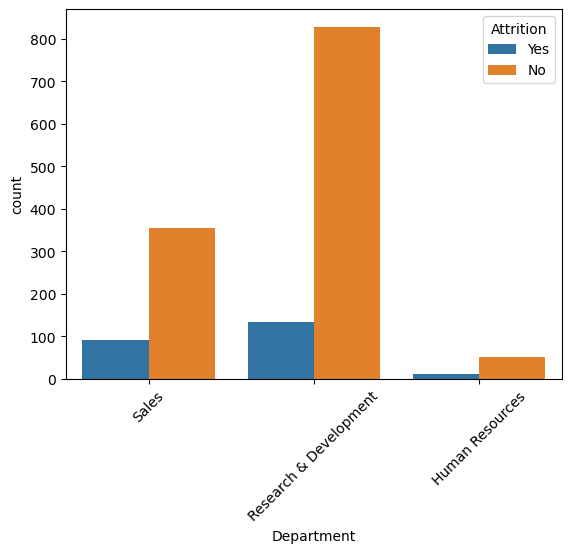

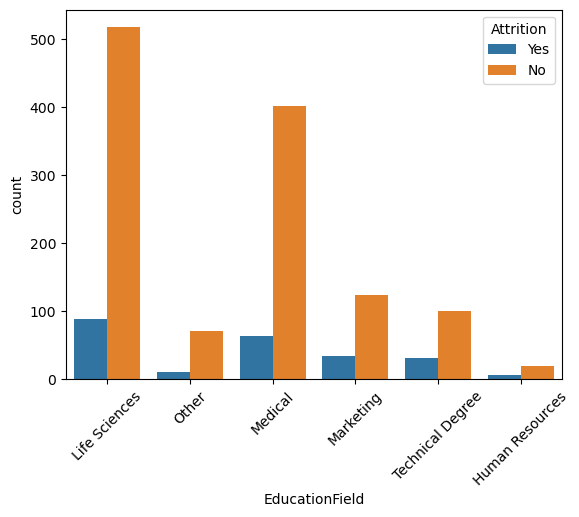

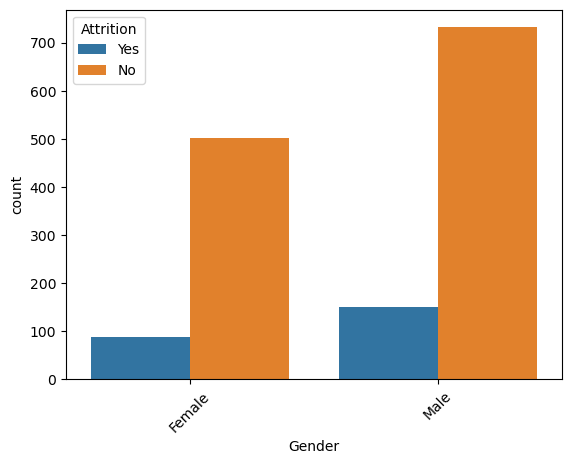

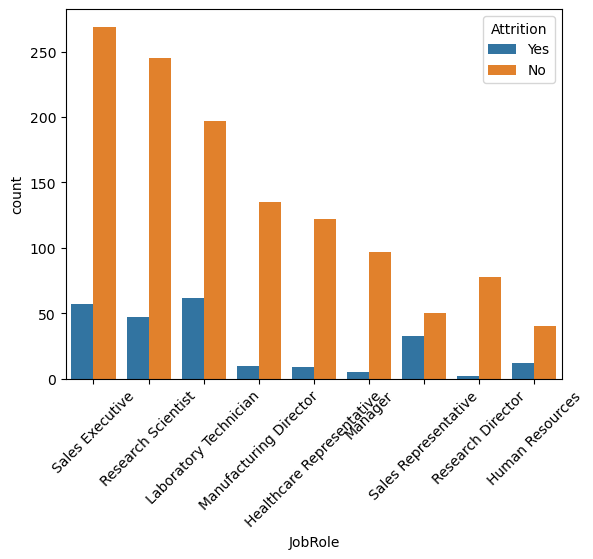

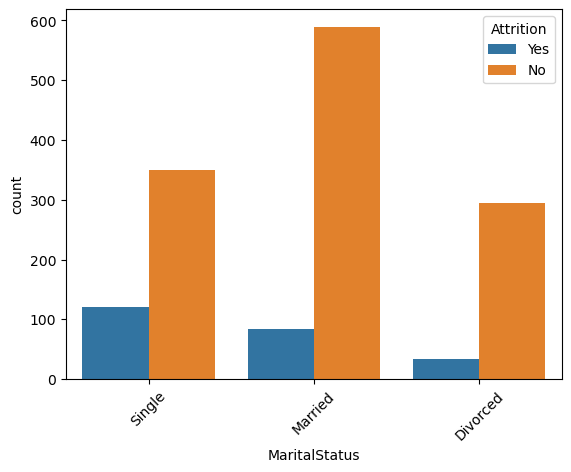

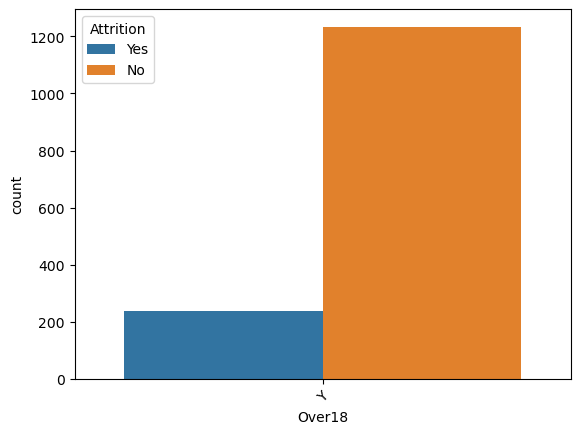

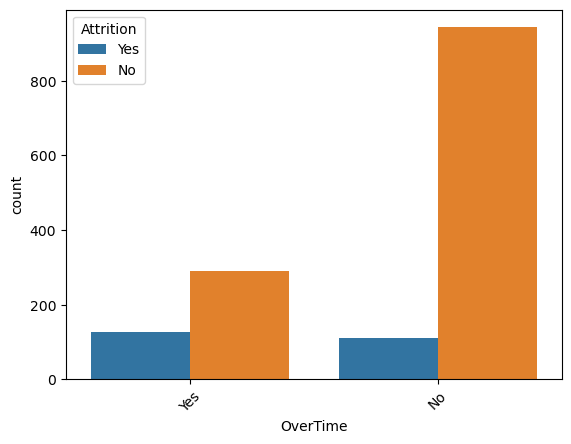

In [71]:
#Plotting the categorical columns with respect to the target column
for col in data.select_dtypes(include=object).columns:
    plt.figure()
    plt.xticks(rotation=45)
    sns.countplot(data=data, x=col, hue='Attrition')

We can see a clear imbalance between the target, Attrition, as we have more No than Yes, we will adress that imbalance later.

We can also see some columns that will not help much, as Over18, as all employees are Over 18, StandardHours, as every employee has 80 and EmployeeCount, as all the values are 1. We will drop those columns directly.

From the information gathered in this first step, we can also say with confidence that the best way to deal with the categorical columns is to use label encoding, as all the values in each categorical column have relationships. We can use LabelEncoder to do that automatically, but, with the little amount of categorical values, we can do it by hand, that way we can ensure a good encoding and we will have a guide to go back and check what value represents what.

From the plots, we can start to see which features impact more on the attrition of the employees, but will use a model with feature importancde to select them.

In [72]:
#Drop the columns that are not required
data.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '31'),
  Text(25, 0, '32'),
  Text(26, 0, '33'),
  Text(27, 0, '40')])

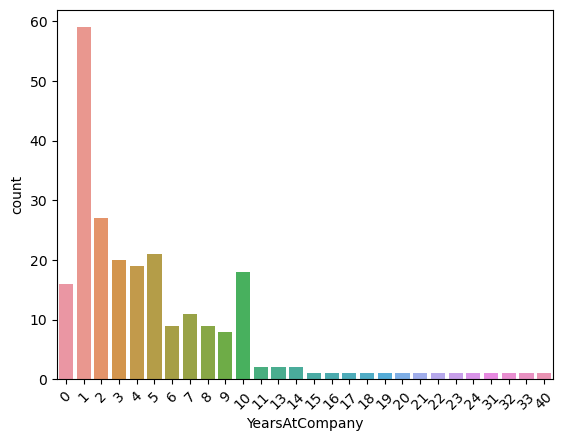

In [73]:
#Filtering the data for employees with attrition, to get more accurate insights
yes_attrition = data[data['Attrition'] == 'Yes']

#Plotting the years at company for employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='YearsAtCompany')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15')])

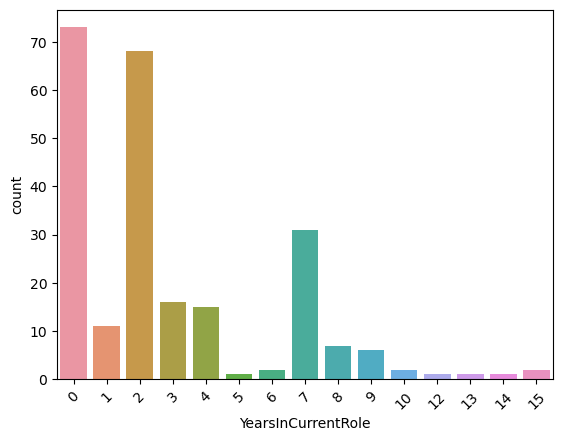

In [74]:
#Plotting the years in current role for employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='YearsInCurrentRole')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

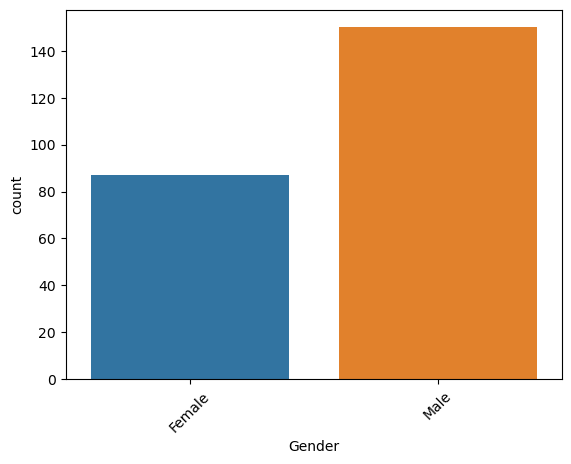

In [75]:
#Plotting the gender of employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='Gender')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

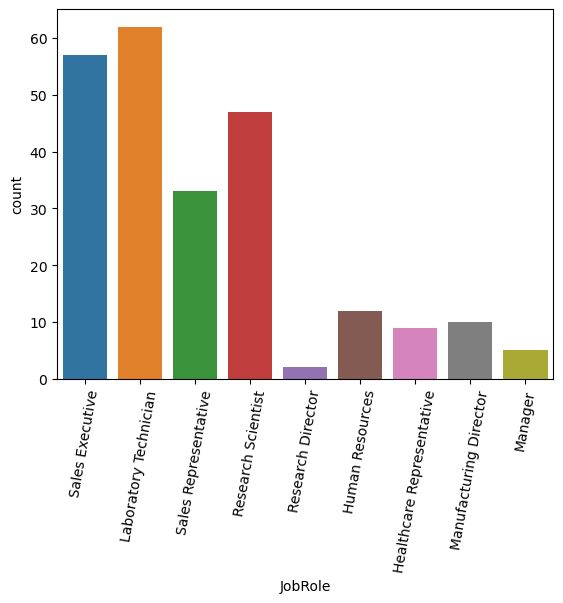

In [76]:
#Plotting the job role of employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='JobRole')
plt.xticks(rotation=80)

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500')])

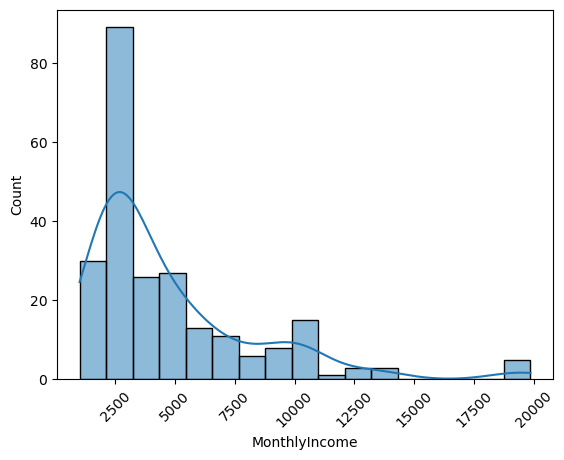

In [77]:
#Plotting the monthly income of employees with attrition
plt.figure()
sns.histplot(data=yes_attrition['MonthlyIncome'], kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

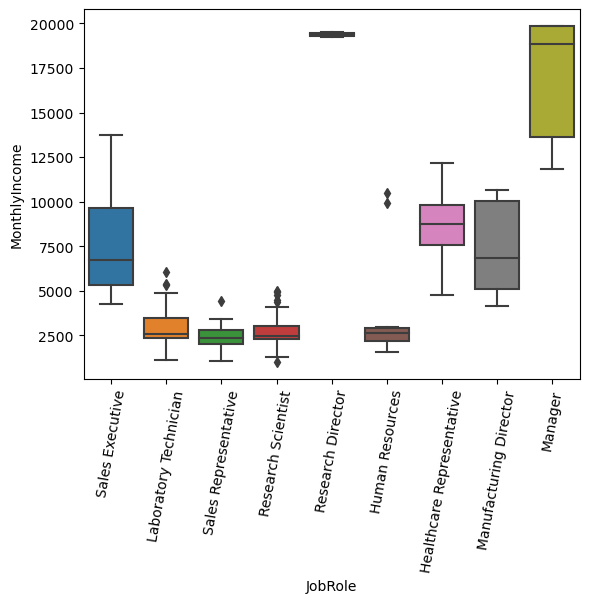

In [78]:
#Plottting the relationship between the monthly income and the job role of employees with attrition
plt.figure()
sns.boxplot(data=yes_attrition, x='JobRole', y='MonthlyIncome')
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

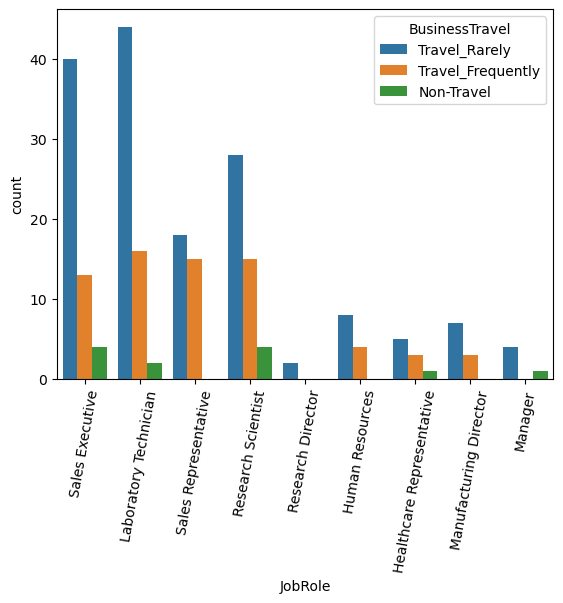

In [79]:
#Plotting the relationship between the travel frequency and the job role of employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='JobRole', hue='BusinessTravel')
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

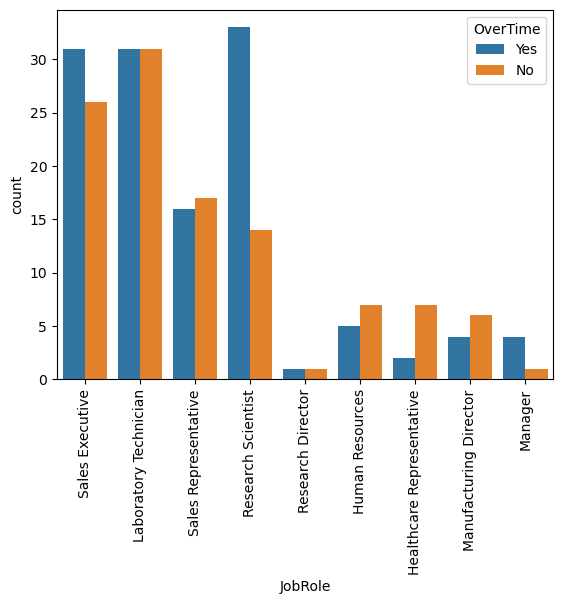

In [80]:
#Plotting the relationship between the job role and the overtime of employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='JobRole', hue='OverTime')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

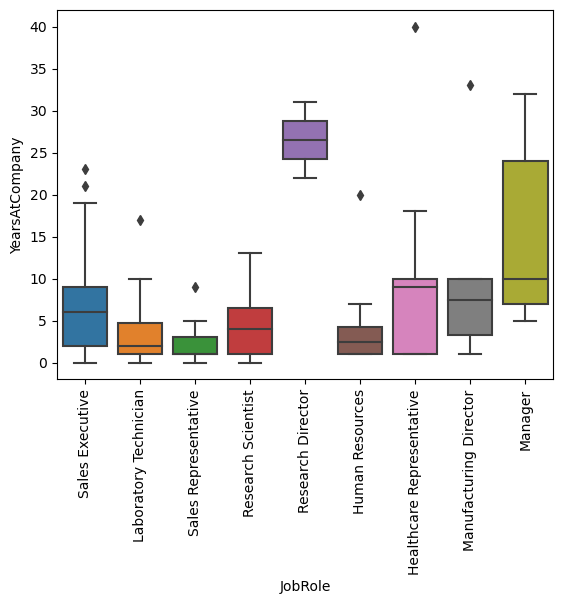

In [81]:
#Plotting the relationship between the job role and the years at company of employees with attrition
plt.figure()
sns.boxplot(data=yes_attrition, x='JobRole', y='YearsAtCompany')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

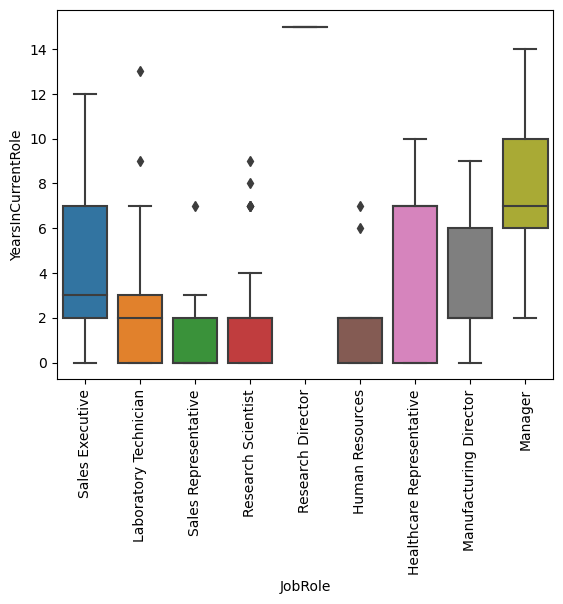

In [82]:
#Plotting the relationship between the job role and the years in current role of employees with attrition
plt.figure()
sns.boxplot(data=yes_attrition, x='JobRole', y='YearsInCurrentRole')
plt.xticks(rotation=90)

## Data Preprocesing

In [84]:
# #Separating categorical and numerical columns
cat_cols = data.select_dtypes(include=object)
cat_cols = pd.concat([cat_cols, data[['Education', 'EnvironmentSatisfaction', 'JobLevel', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']]], axis=1)
# #Adding the columns that are not in the categorical columns to the numerical columns
num_cols = data.drop(columns=cat_cols.columns)

# #Encoding the categorical columns
# #Creating a dictionary for the column Gender
# gender_dict = {'Male': 0, 'Female': 1}
# cat_cols['Gender'] = cat_cols['Gender'].map(gender_dict)

# #Creating a dictionary for the column BusinessTravel
# business_travel_dict = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
# cat_cols['BusinessTravel'] = cat_cols['BusinessTravel'].map(business_travel_dict)

# #Creating a dictionary for the column Department
# department_dict = {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}
# cat_cols['Department'] = cat_cols['Department'].map(department_dict)

# #Creating a dictionary for the column EducationField
# education_field_dict = {'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}
# cat_cols['EducationField'] = cat_cols['EducationField'].map(education_field_dict)

# #Creating a dictionary for the column JobRole
# job_role_dict = {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}
# cat_cols['JobRole'] = cat_cols['JobRole'].map(job_role_dict)

# #Creating a dictionary for the column MaritalStatus
# marital_status_dict = {'Single': 0, 'Married': 1, 'Divorced': 2}
# cat_cols['MaritalStatus'] = cat_cols['MaritalStatus'].map(marital_status_dict)

# #Creating a dictionary for the column Overtime
# overtime_dict = {'No': 0, 'Yes': 1}
# cat_cols['OverTime'] = cat_cols['OverTime'].map(overtime_dict)

# #Creating a dictionary for the target column Attrition
# attrition_dict = {'No': 0, 'Yes': 1}
# cat_cols['Attrition'] = cat_cols['Attrition'].map(attrition_dict)

In [85]:
#Using LabelEncoder for the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols.columns:
    cat_cols[col] = le.fit_transform(cat_cols[col])

In [87]:
cat_cols.head()

Attrition  BusinessTravel  Department  EducationField  Gender  \
EmployeeNumber                                                                  
1                       1               2           2               1       0   
2                       0               1           1               1       1   
4                       1               2           1               4       1   
5                       0               1           1               1       0   
7                       0               2           1               3       1   

                JobRole  MaritalStatus  OverTime  Education  \
EmployeeNumber                                                
1                     7              2         1          1   
2                     6              1         0          0   
4                     2              2         1          1   
5                     6              1         1          3   
7                     2              1         0          0   

                EnvironmentSatisfaction  JobLevel  JobInvolvement  \
EmployeeNumber                                                      
1                                     1         1               2   
2                                     2         1               1   
4                                     3         0               1   
5                                     3         0               2   
7                                     0         0               2   

                JobSatisfaction  PerformanceRating  RelationshipSatisfaction  \
EmployeeNumber                                                                 
1                             3                  0                         0   
2                             1                  1                         3   
4                             2                  0                         1   
5                             2                  0                         2   
7                             1                  0                         3   

                StockOptionLevel  WorkLifeBalance  
EmployeeNumber                                     
1                              0                0  
2                              1                2  
4                              0                2  
5                              0                2  
7                              1                2

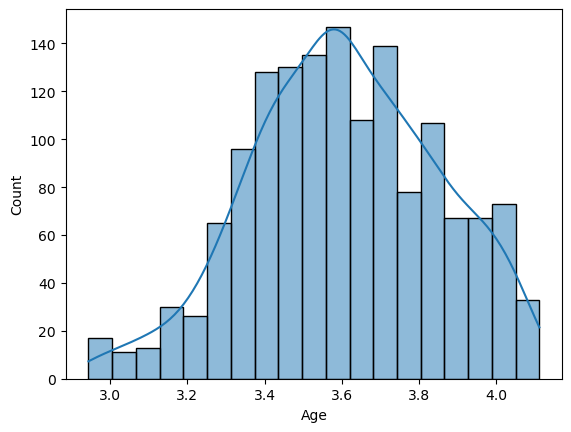

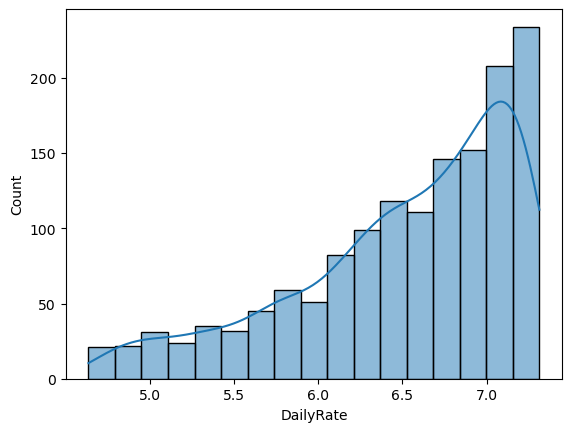

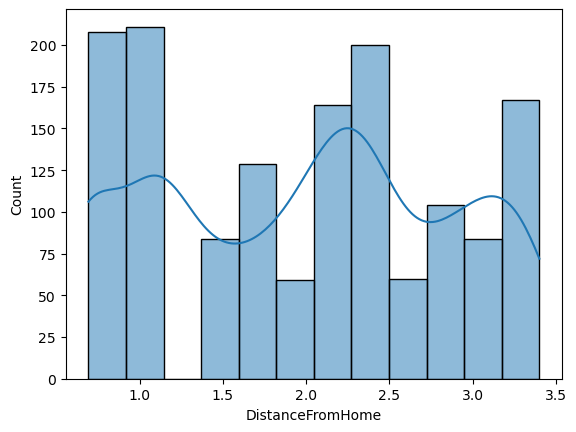

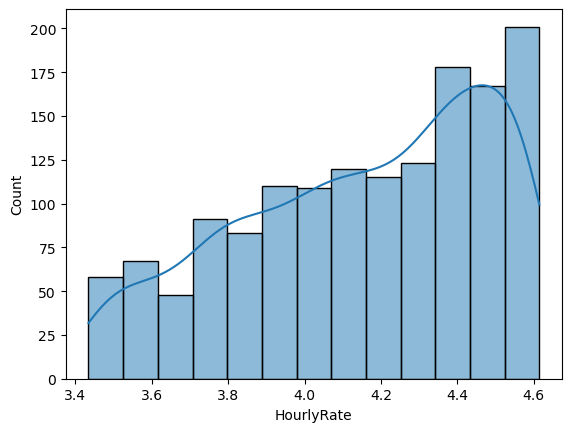

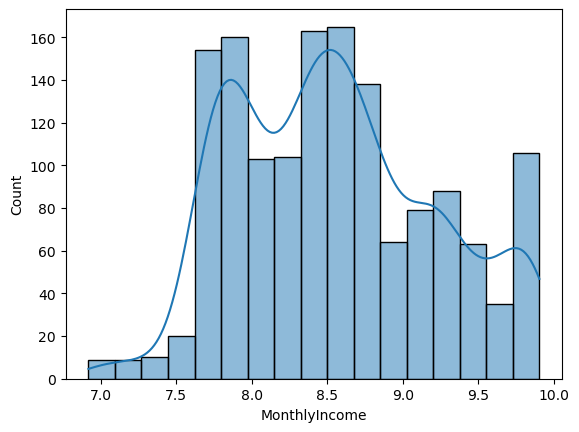

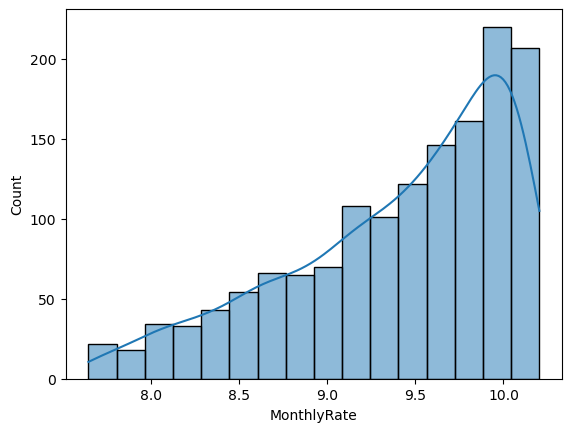

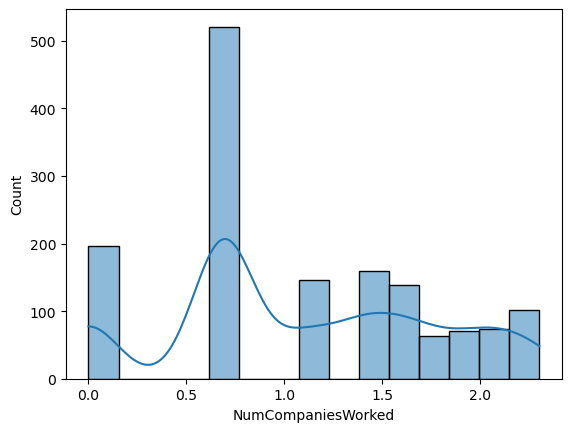

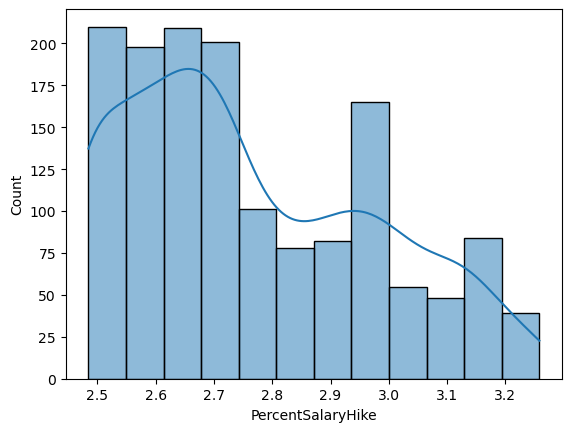

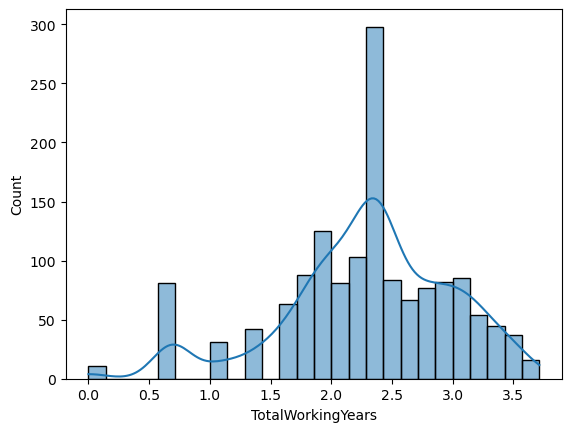

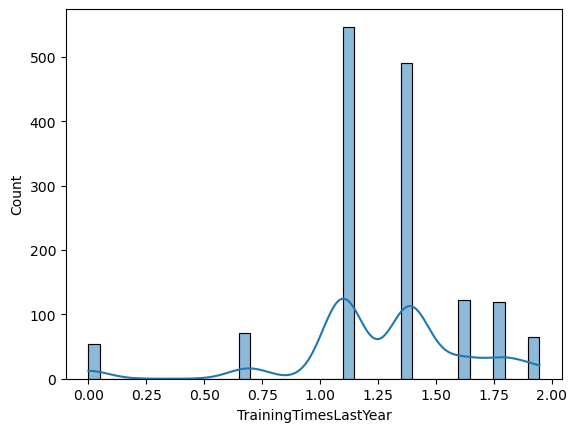

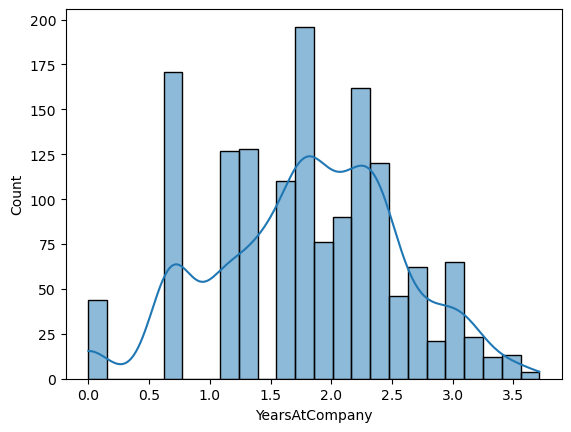

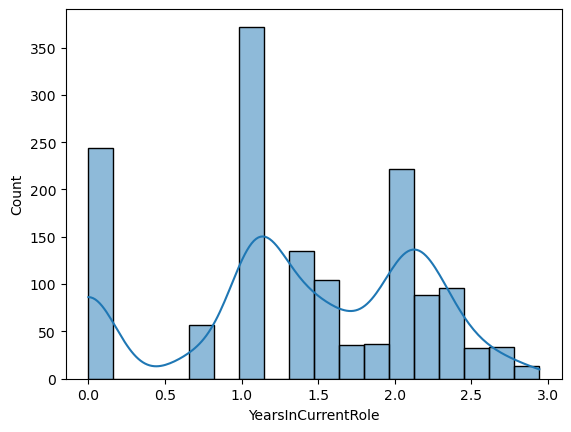

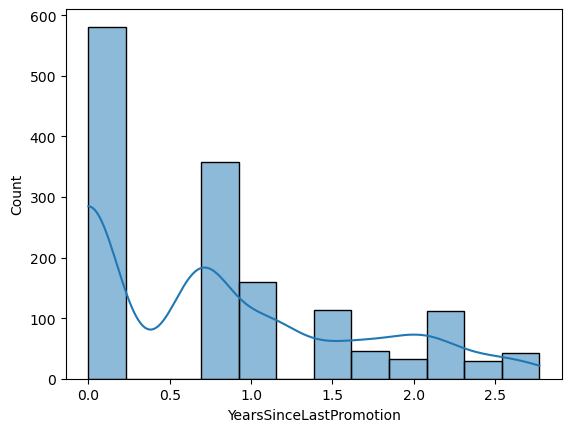

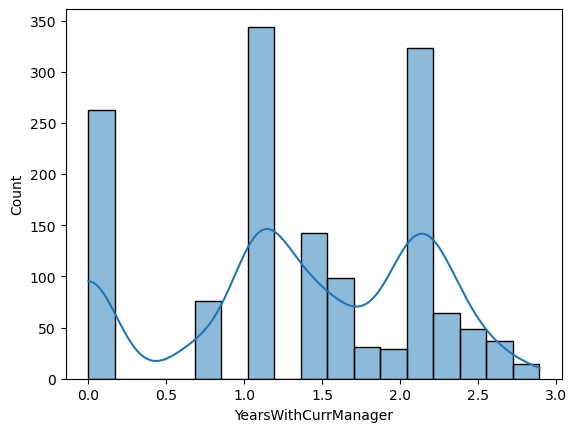

In [88]:
#Testing different scaler for the numerical columns
from sklearn.preprocessing import StandardScaler, PowerTransformer

#Creating a copy of the data
log_data = num_cols.copy()
standard_data = num_cols.copy()
power_data = num_cols.copy()

#Applying the log transformation to the numerical columns
for col in log_data.columns:
    log_data[col] = np.log1p(log_data[col])

#Plottting the distribution of the numerical columns after applying the log transformation
for col in log_data.columns:
    plt.figure()
    sns.histplot(data=log_data[col], kde=True)

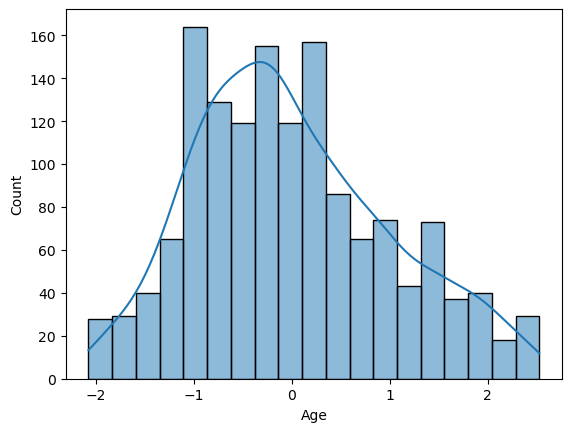

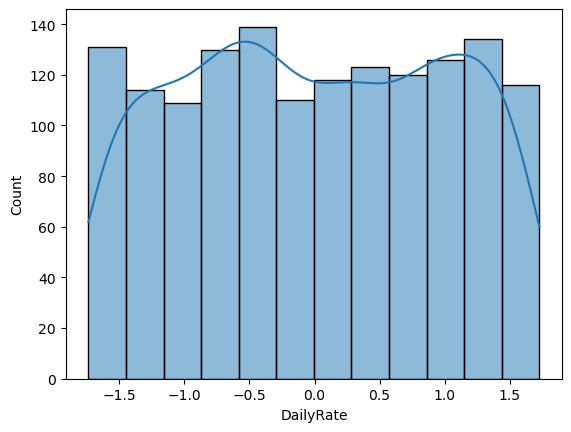

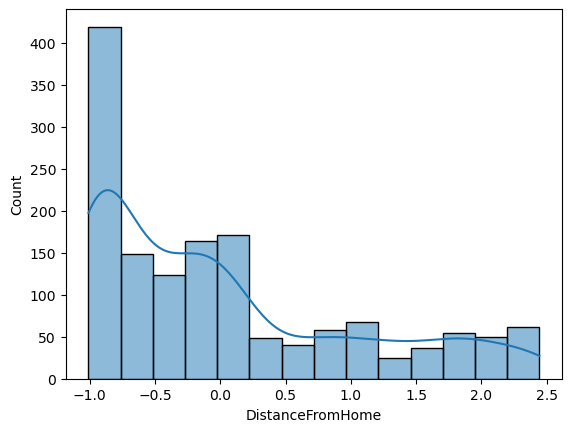

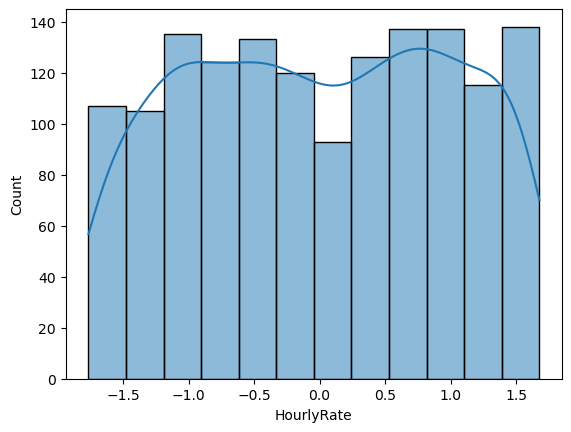

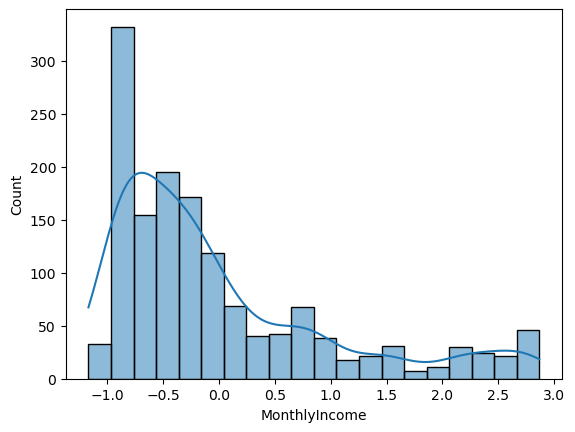

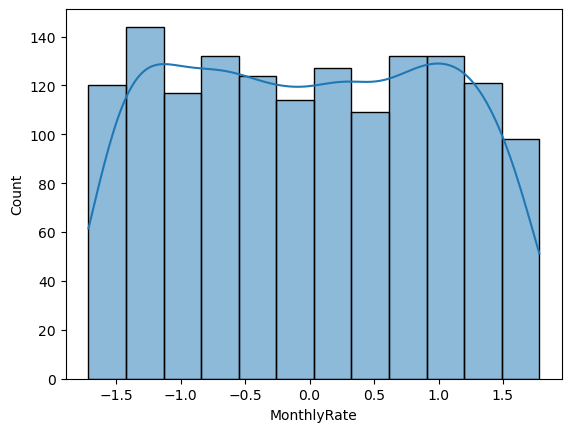

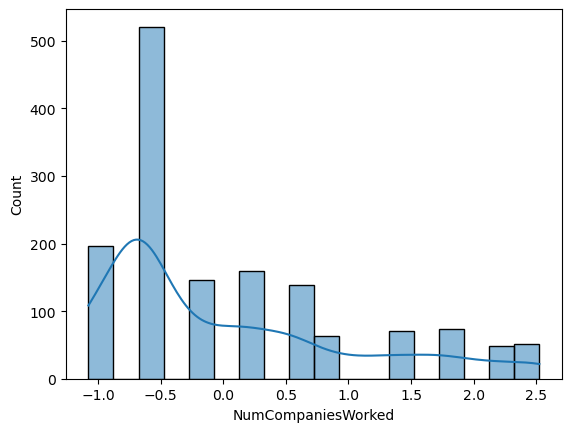

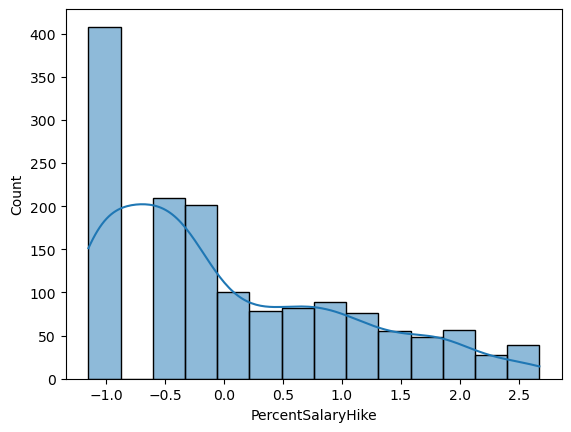

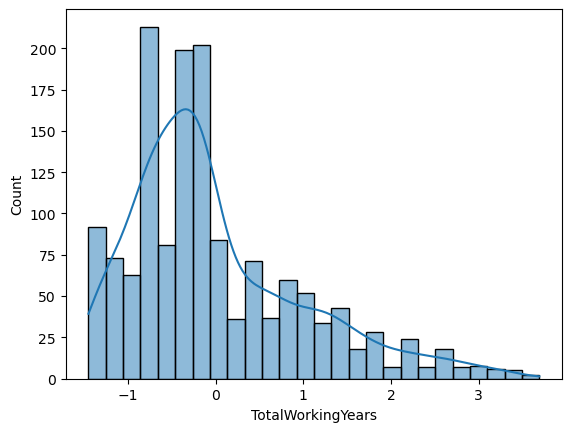

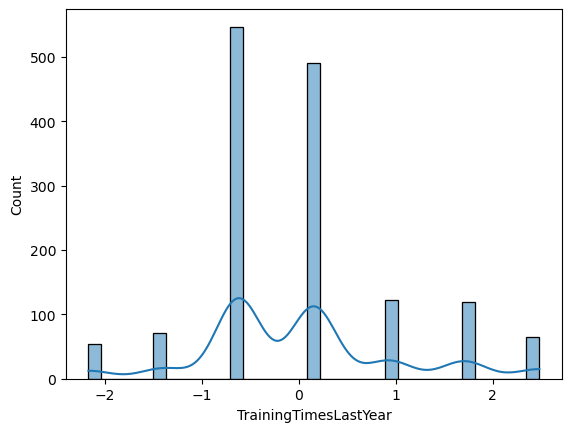

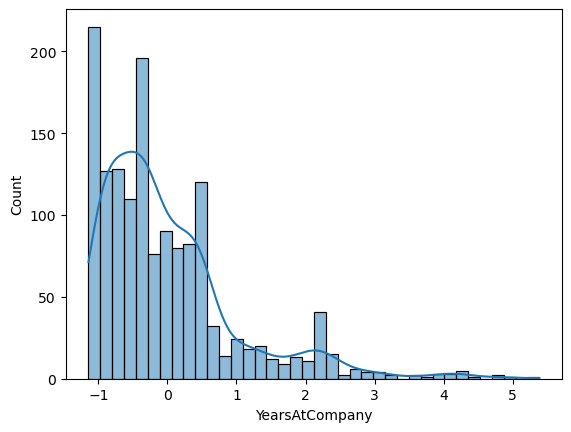

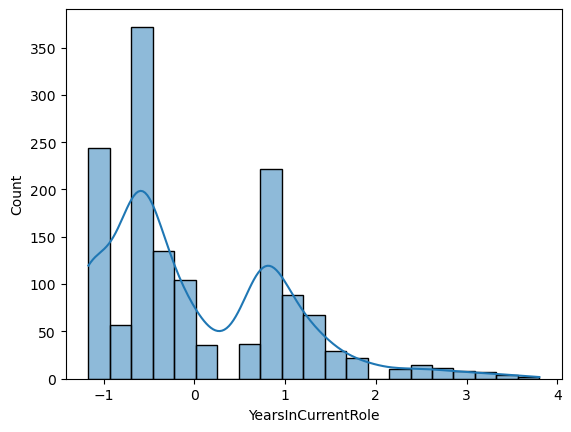

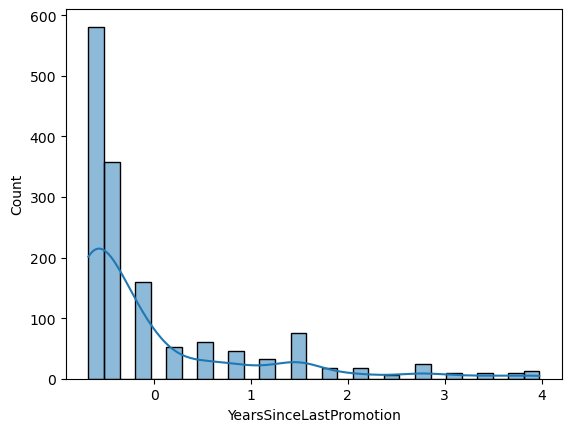

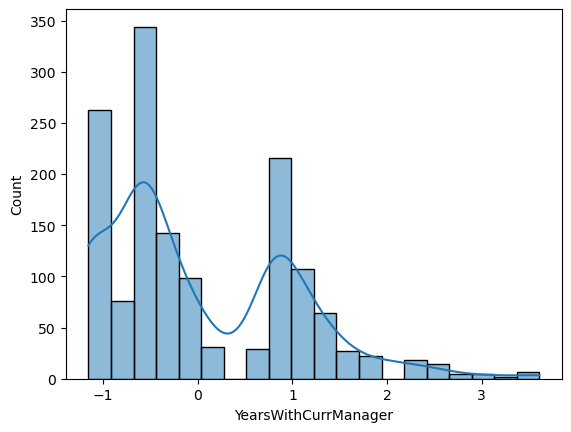

In [89]:
#Applying the standard scaler to the numerical columns
scaler = StandardScaler()
standard_data[standard_data.columns] = scaler.fit_transform(standard_data[standard_data.columns])

#Plottting the distribution of the numerical columns after applying the standard scaler
for col in standard_data.columns:
    plt.figure()
    sns.histplot(data=standard_data[col], kde=True)

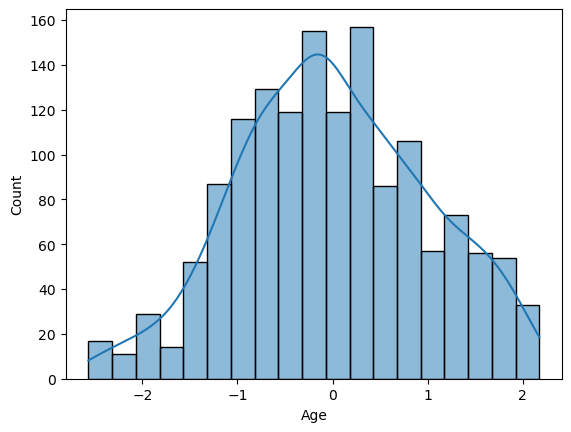

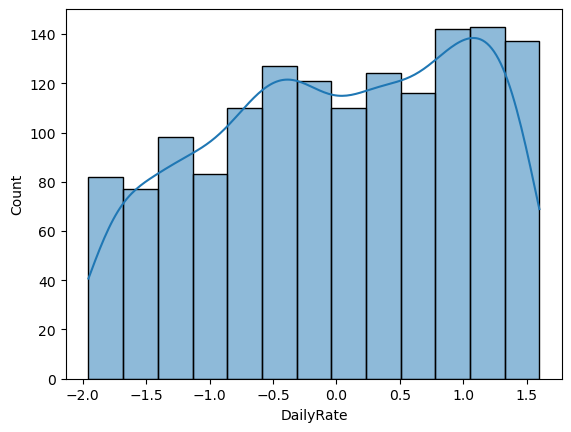

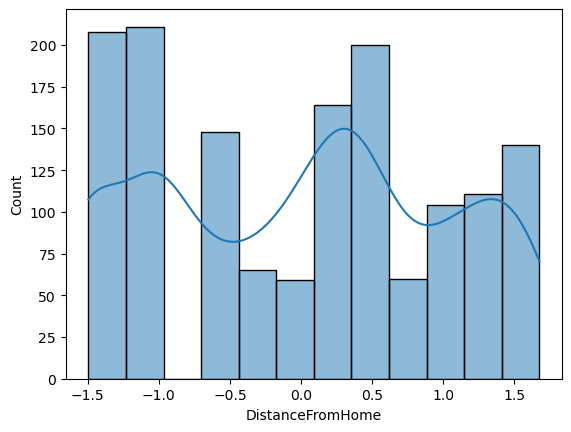

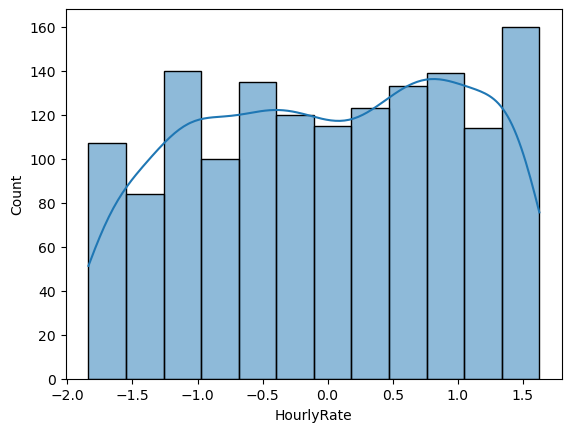

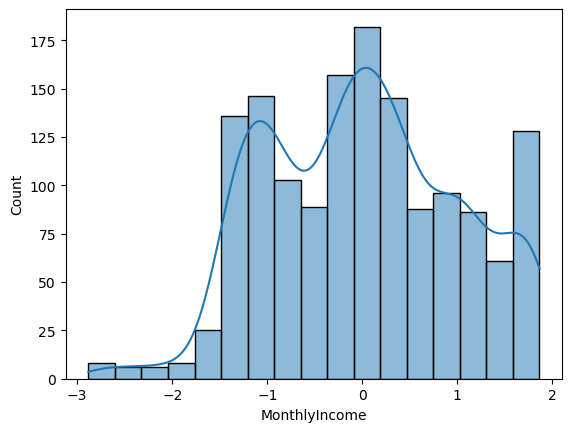

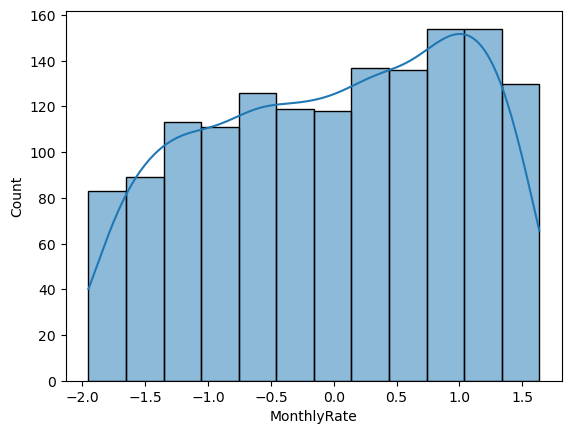

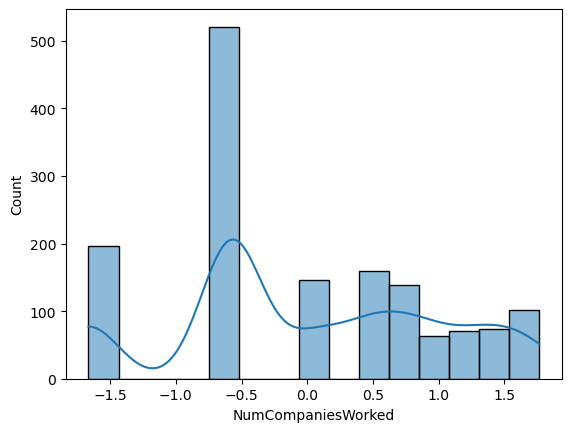

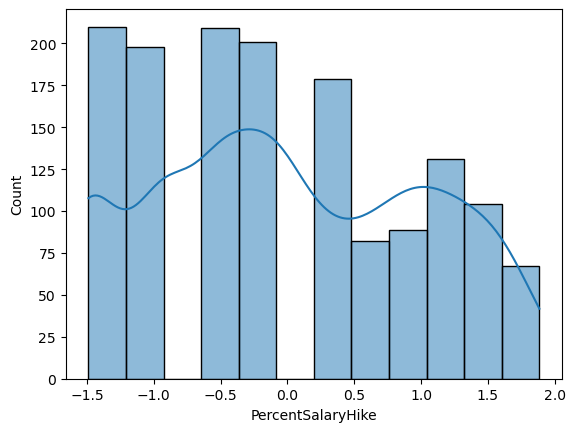

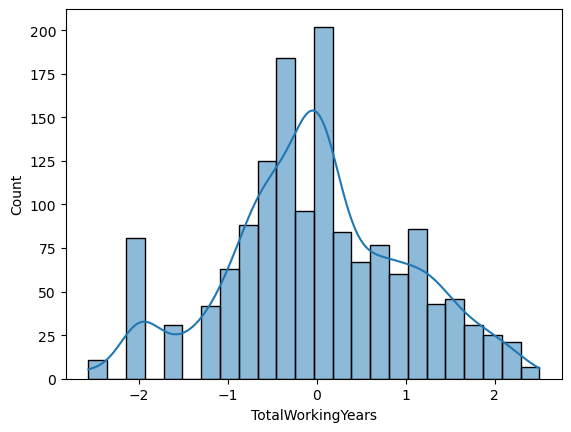

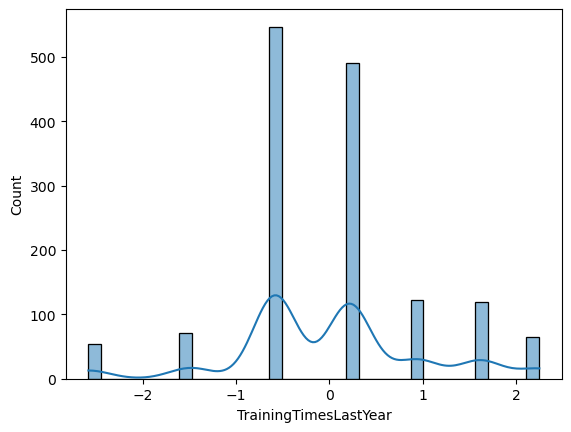

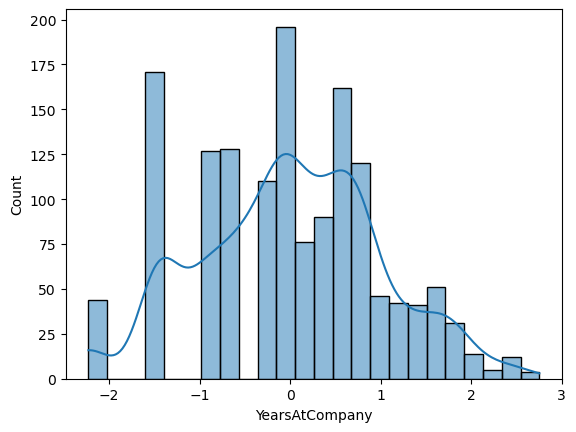

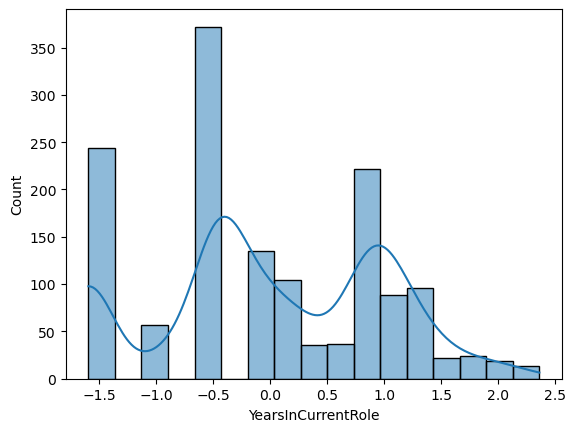

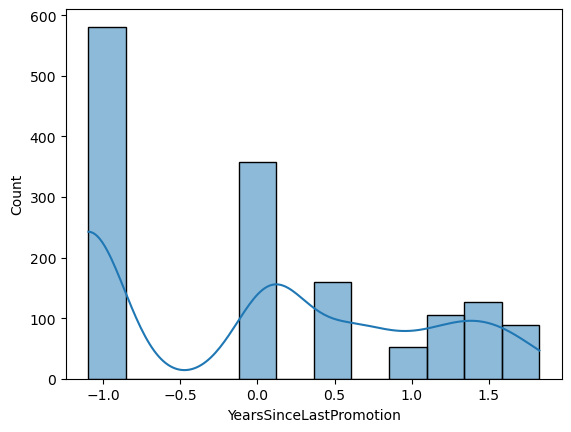

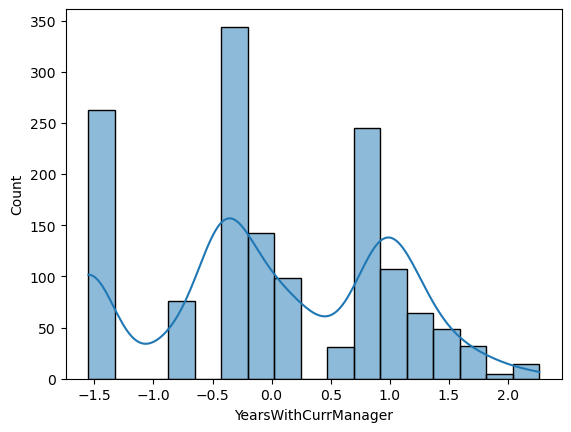

In [90]:
#Applying the power transformer to the numerical columns
power = PowerTransformer()
power_data[power_data.columns] = power.fit_transform(power_data[power_data.columns])

#Plottting the distribution of the numerical columns after applying the power transformer
for col in power_data.columns:
    plt.figure()
    sns.histplot(data=power_data[col], kde=True)

I think PowerScaler gives better results, so I will stick with it.

In [91]:
#Applying winsorization to the numerical columns
from feature_engine.outliers import Winsorizer

#Creating a copy of the data
winsor_data = power_data.copy()

#Applying the winsorizer to the numerical columns
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=list(winsor_data.columns))
winsor_data[winsor_data.columns] = winsorizer.fit_transform(winsor_data)

In [92]:
#Concatenating the categorical and numerical columns
final_data = pd.concat([cat_cols, winsor_data], axis=1)

<Axes: >

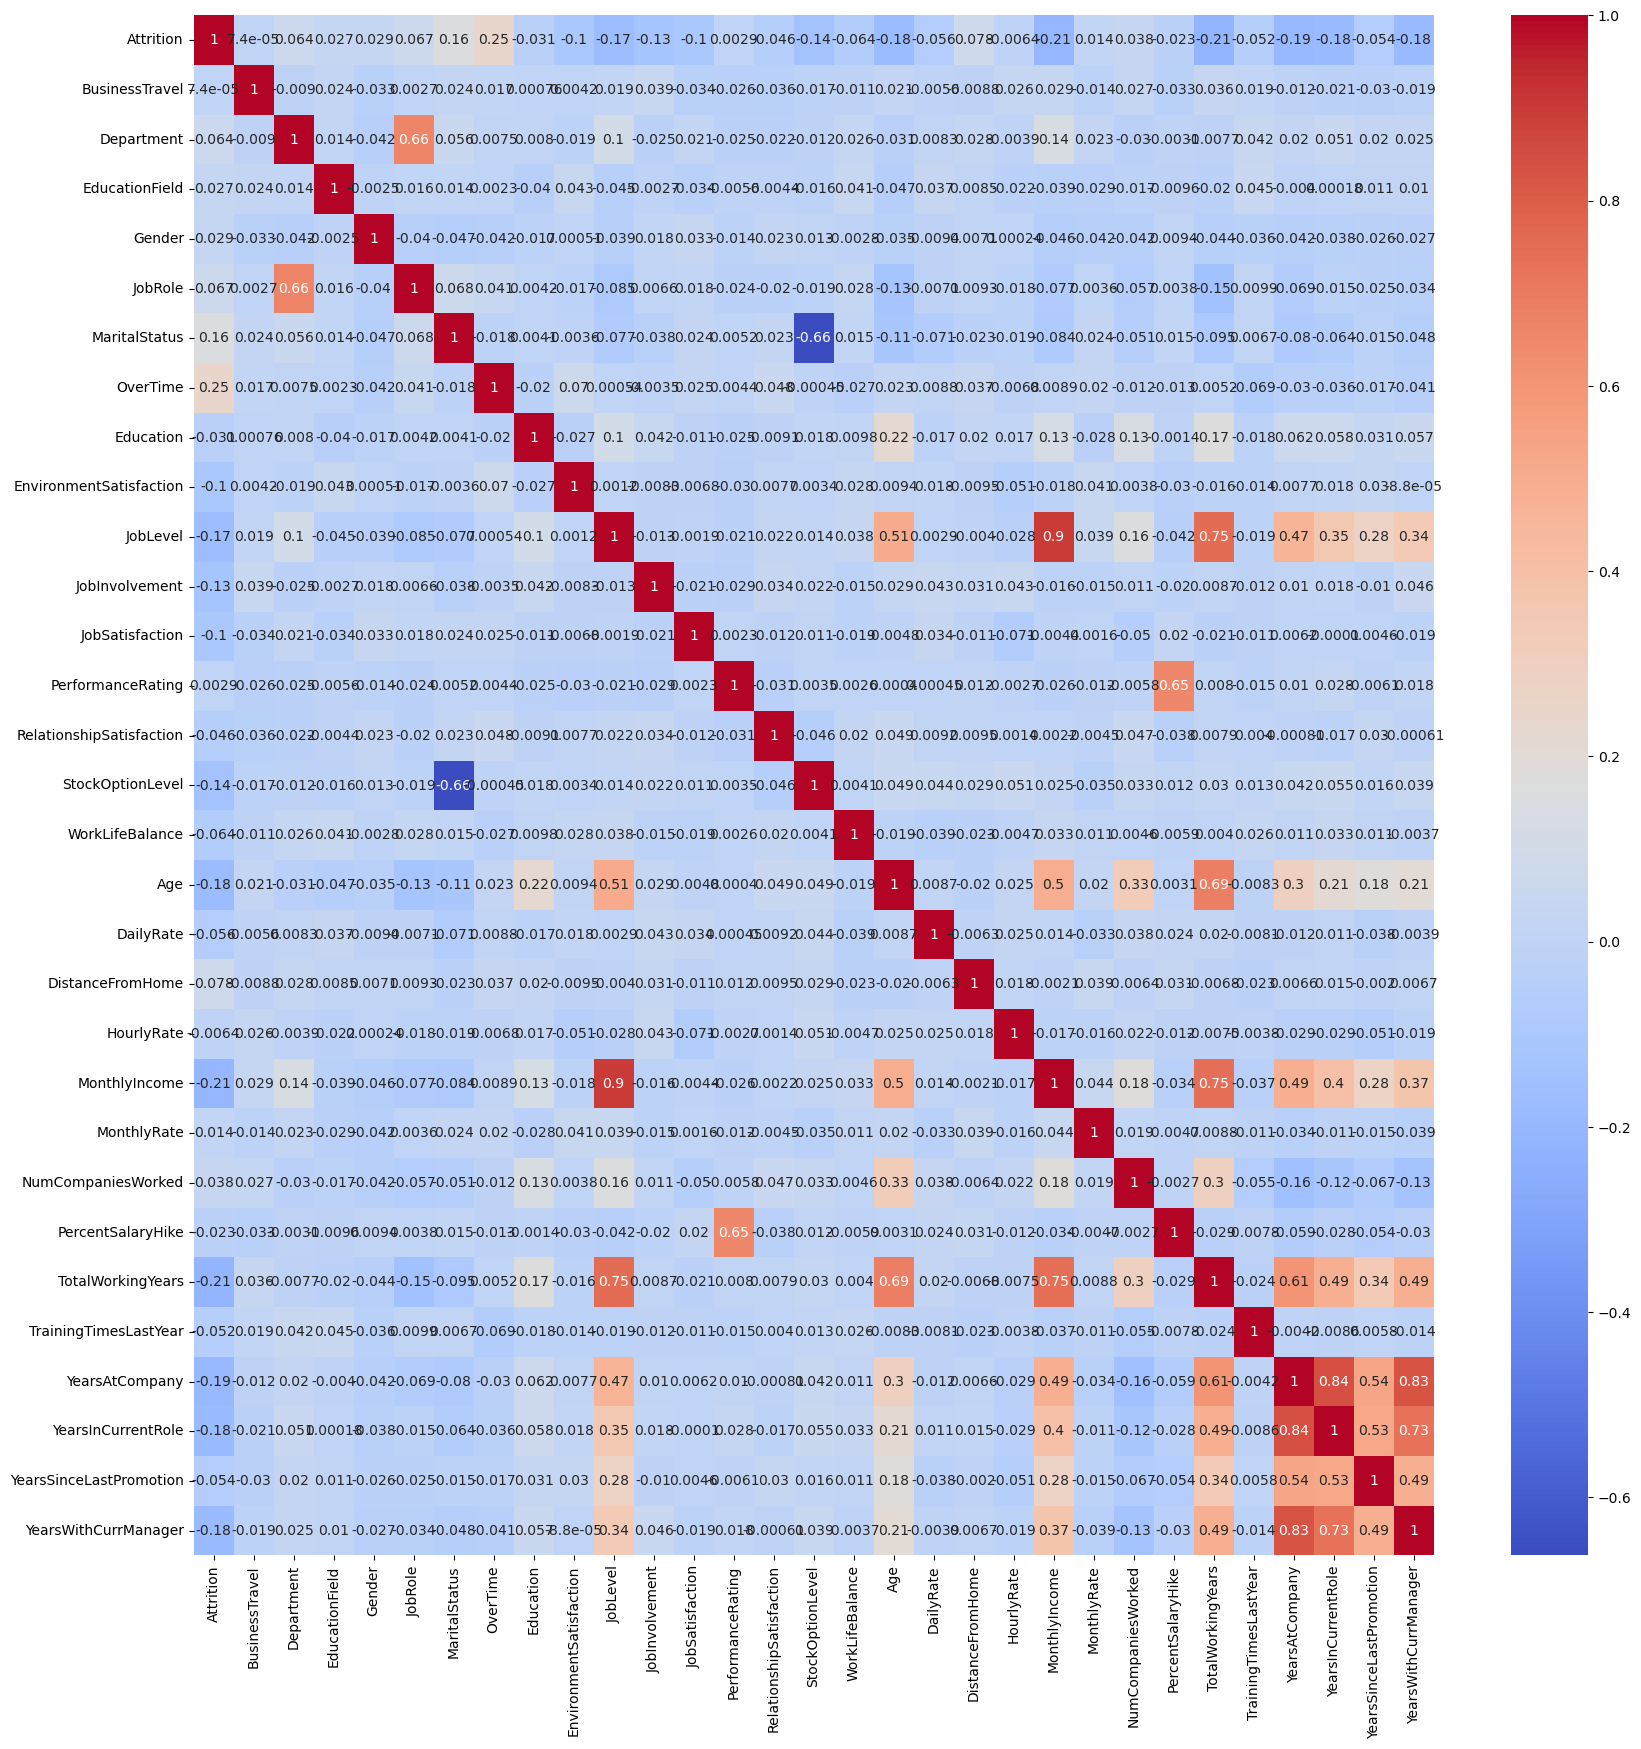

In [93]:
#Checking the correlation between the columns
plt.figure(figsize=(20, 20))
sns.heatmap(final_data.corr(), annot=True, cmap='coolwarm')

We see that there's high correlation between JobLevel and MonthlyIncome and then between YearsAtCompamy with YearsInCurrentRole and YearsWithCurrManager. For now, as all of them may play a role in the prediction, I will leave them, If the performance of the model can be improved by removing them, will do it later.

In [94]:
#Checking the relationship between the columns and the target column
final_data.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.078213
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.037554
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.014483
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006390
PercentSalaryHike          -0.022524
Education                  -0.031373
RelationshipSatisfaction   -0.045872
TrainingTimesLastYear      -0.051959
YearsSinceLastPromotion    -0.054479
DailyRate                  -0.055923
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
StockOptionLevel           -0.137145
JobLevel                   -0.169105
Age                        -0.175766
YearsInCurrentRole         -0.182921
Y

In [95]:
#Splitting the data into features and target
X = final_data.drop(columns='Attrition')
y = final_data['Attrition']

#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Testing the models

In [96]:
#Now, I will create a function to test different models to select the one that gives the best results and work with it.
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

def model_test(models, X_train, y_train):
    results = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            'Model': str(model),
            'Accuracy': accuracy_score(y_test, y_pred),
            'AUC-ROC Score': roc_auc_score(y_test, y_pred)
        })
    # Plot confusion matrices
    plt.figure(figsize=(12, 34))
    for i, model_results in enumerate(results):
        plt.subplot(len(models), 1, i+1)
        plt.title(f'Confusion Matrix for {model_results["Model"]}')
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.xticks(rotation=45)
    return pd.DataFrame(results)

Model  Accuracy  AUC-ROC Score
0          LogisticRegression()  0.863946       0.643380
1      DecisionTreeClassifier()  0.744898       0.572530
2      RandomForestClassifier()  0.843537       0.562322
3        ExtraTreesClassifier()  0.846939       0.564347
4                         SVC()  0.843537       0.536480
5                  GaussianNB()  0.785714       0.674347
6  GradientBoostingClassifier()  0.846939       0.572961
7          AdaBoostClassifier()  0.857143       0.639332
8               MLPClassifier()  0.840136       0.663666
9   GaussianProcessClassifier()  0.823129       0.550177

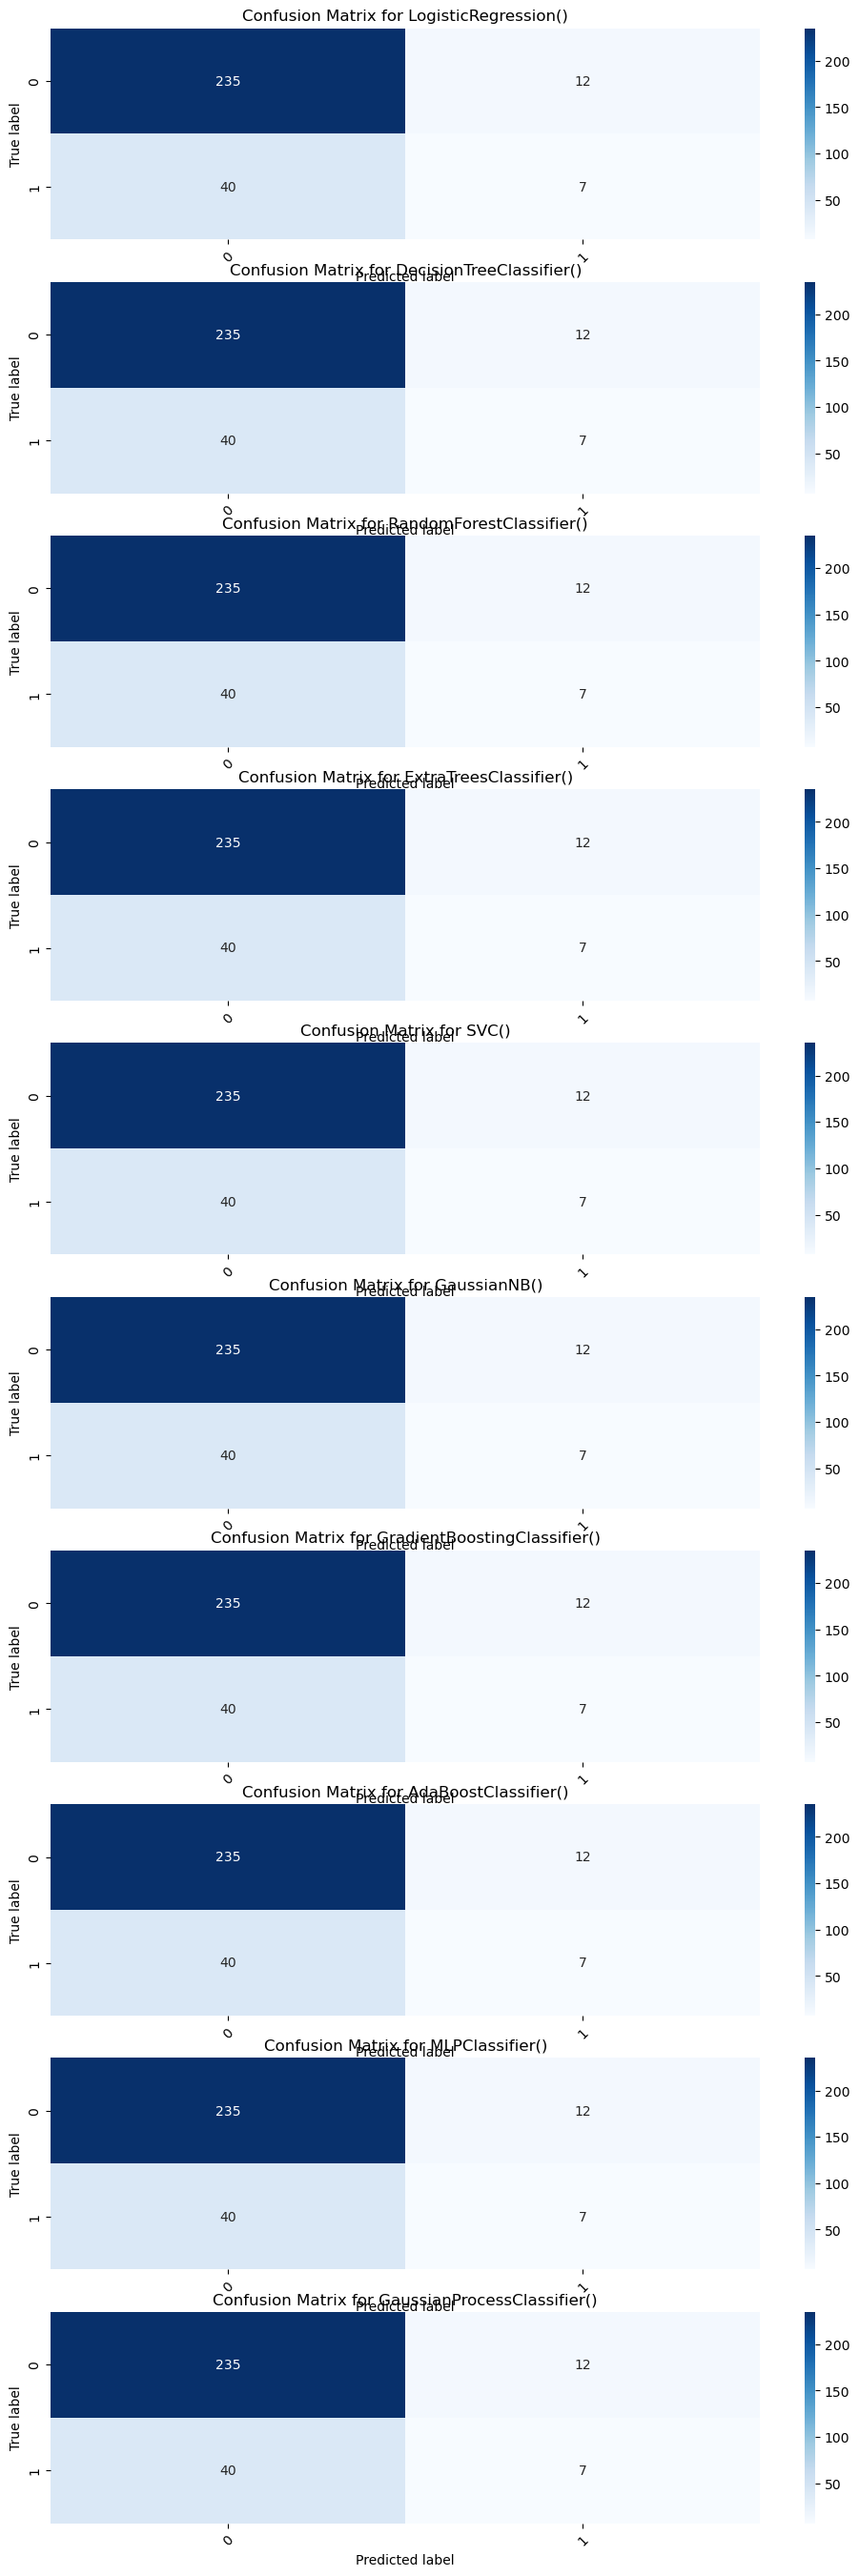

In [97]:
#Creating a list of the models
models = [LogisticRegression(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            ExtraTreesClassifier(),
            SVC(),
            GaussianNB(),
            GradientBoostingClassifier(),
            AdaBoostClassifier(),
            MLPClassifier(),
            GaussianProcessClassifier()]

#Testing the models
model_test(models, X_train, y_train)

Looking at the results, we can see that MLP Classifier is giving really good results, with an accuracy of 0.88 and an AOC score of 0.73. Before trying to balance the data, I will try to work on that model and see what results we get after some tweaking and feature selection and engineering.

Accuracy: 0.826530612244898
AUC-ROC Score: 0.6211129296235679
AUC-PR Score: 0.4479774771431864
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.92      0.32      0.90      0.54      0.31       247
          1       0.44      0.32      0.92      0.37      0.54      0.28        47

avg / total       0.81      0.83      0.42      0.81      0.54      0.31       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

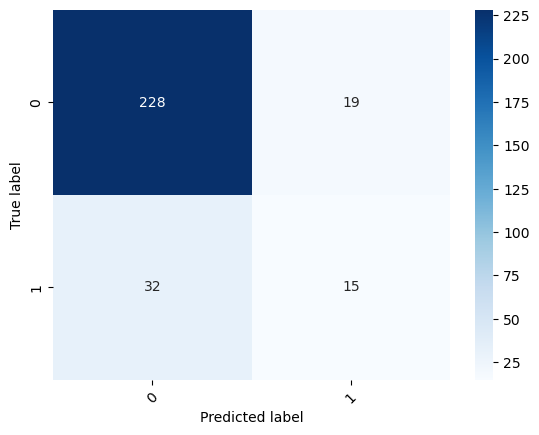

In [98]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_recall_curve, auc
#Testing the base model

mlp = MLPClassifier()
model = mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print( classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

As we can see from the results, the recall from the main feature that we want to predict is really low, so I will check the model by getting the best hyperparameters. After that, depending on the results, we will check other alternatives.

In [99]:
#Getting the best hyperparameters for the model
from sklearn.model_selection import GridSearchCV

#Creating a dictionary of hyperparameters
param_grid = {
    'hidden_layer_sizes': [(100,), (150,), (200,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

#Creating the grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=1)

#Fitting the grid search
grid_search.fit(X_train, y_train)

#Getting the best hyperparameters
grid_search.best_params_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


{'activation': 'tanh',
 'alpha': 0.01,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'invscaling',
 'solver': 'adam'}

Accuracy: 0.8605442176870748
AUC-ROC Score: 0.641355844603325
AUC-PR Score: 0.5412792390751295
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.96      0.32      0.92      0.55      0.33       247
          1       0.62      0.32      0.96      0.42      0.55      0.29        47

avg / total       0.84      0.86      0.42      0.84      0.55      0.32       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

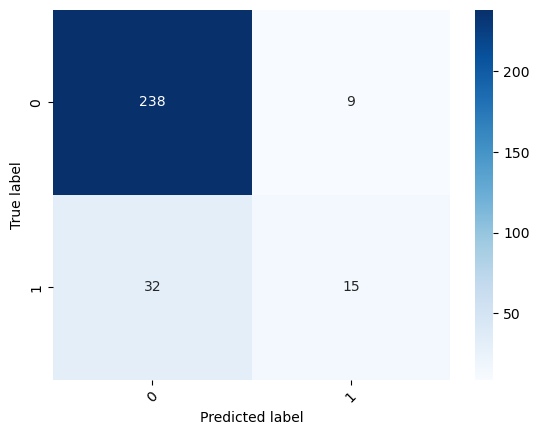

In [100]:
#Running the model with the best hyperparameters
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(200,), activation='logistic', learning_rate='adaptive', solver='adam')
model = mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print( classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Again, even though the results were really good, we want to get better results predicting the positive class. To do that, I will use the models from the library Imblearn, tuned for imbalanced data.

Accuracy: 0.7448979591836735
AUC-ROC Score: 0.7017400292876217
AUC-PR Score: 0.3913309899047958
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.77      0.64      0.83      0.70      0.49       247
          1       0.34      0.64      0.77      0.44      0.70      0.48        47

avg / total       0.83      0.74      0.66      0.77      0.70      0.49       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

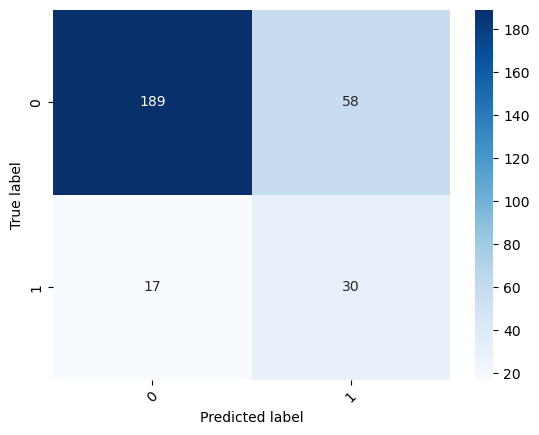

In [101]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

#Testing the BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier()
model = brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print( classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

In [102]:
#Getting the best hyperparameters for the model
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
}

#Creating the grid search
grid_search = GridSearchCV(brf, param_grid, cv=5, n_jobs=-1, verbose=1)

#Fitting the grid search
grid_search.fit(X_train, y_train)

#Getting the best hyperparameters
grid_search.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 100}

Accuracy: 0.7551020408163265
AUC-ROC Score: 0.7250409165302782
AUC-PR Score: 0.3878653836458678
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.77      0.68      0.84      0.72      0.53       247
          1       0.36      0.68      0.77      0.47      0.72      0.52        47

avg / total       0.84      0.76      0.69      0.78      0.72      0.53       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

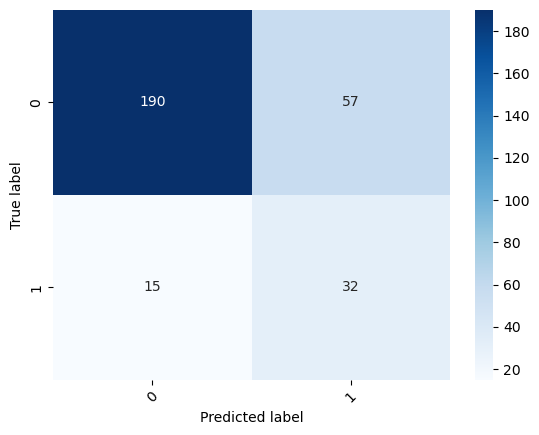

In [103]:
#Running the model with the best hyperparameters
brf = BalancedRandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=150)
model = brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print( classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

With Balanced Random Forest, we can see that the recall for the positive class has improved substantially, by loosing recall in the negative class. Running the tweaked model didn't show a performance improvement.

Accuracy: 0.7244897959183674
AUC-ROC Score: 0.7412783185459557
AUC-PR Score: 0.43012789129320944
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.72      0.77      0.81      0.74      0.55       247
          1       0.34      0.77      0.72      0.47      0.74      0.55        47

avg / total       0.85      0.72      0.76      0.76      0.74      0.55       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

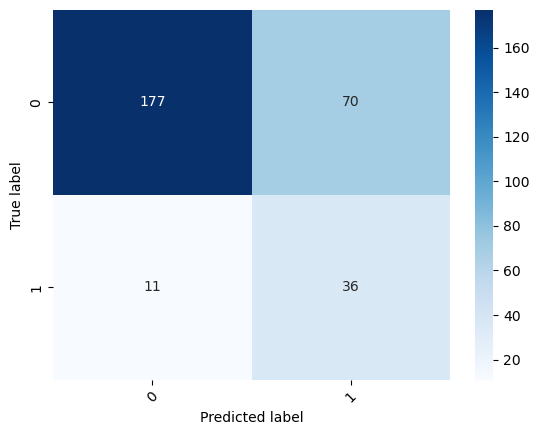

In [104]:
#Testing the EasyEnsembleClassifier
eec = EasyEnsembleClassifier()
model = eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print(classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

In [105]:
#Getting the best hyperparameters for the model
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
}

#Creating the grid search
grid_search = GridSearchCV(eec, param_grid, cv=5, n_jobs=-1, verbose=1)

#Fitting the grid search
grid_search.fit(X_train, y_train)

#Getting the best hyperparameters
grid_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'n_estimators': 150}

Accuracy: 0.7380952380952381
AUC-ROC Score: 0.7579894909122232
AUC-PR Score: 0.4373948324005679
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.73      0.79      0.82      0.76      0.57       247
          1       0.36      0.79      0.73      0.49      0.76      0.58        47

avg / total       0.85      0.74      0.78      0.77      0.76      0.57       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

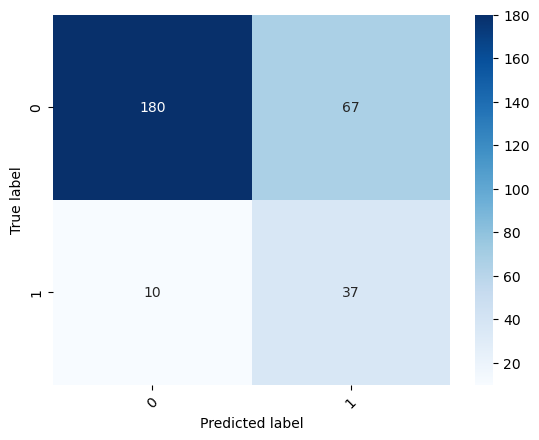

In [106]:
#Testing the EasyEnsembleClassifier with the best parameters
eec = EasyEnsembleClassifier(n_estimators=250)
model = eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print(classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

In [107]:
#Using the feature importances to get the best features for the model
model=brf.fit(X_train, y_train)
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

Importance
MonthlyIncome               0.077834
Age                         0.065209
TotalWorkingYears           0.064015
OverTime                    0.051217
YearsWithCurrManager        0.050874
DailyRate                   0.047741
MonthlyRate                 0.045368
YearsAtCompany              0.044854
StockOptionLevel            0.044453
DistanceFromHome            0.039977
HourlyRate                  0.039069
JobRole                     0.038616
NumCompaniesWorked          0.037790
PercentSalaryHike           0.032332
JobLevel                    0.031632
YearsInCurrentRole          0.030947
EnvironmentSatisfaction     0.030904
MaritalStatus               0.028632
JobSatisfaction             0.025758
YearsSinceLastPromotion     0.022671
WorkLifeBalance             0.021960
RelationshipSatisfaction    0.020189
Education                   0.020023
TrainingTimesLastYear       0.018579
JobInvolvement              0.018151
BusinessTravel              0.015102
EducationField              0.014685
Department                  0.011044
Gender                      0.008306
PerformanceRating           0.002069

Accuracy: 0.6768707482993197
AUC-ROC Score: 0.6957102248255663
AUC-PR Score: 0.31559157007582217
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.67      0.72      0.78      0.70      0.48       247
          1       0.29      0.72      0.67      0.42      0.70      0.49        47

avg / total       0.83      0.68      0.71      0.72      0.70      0.48       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

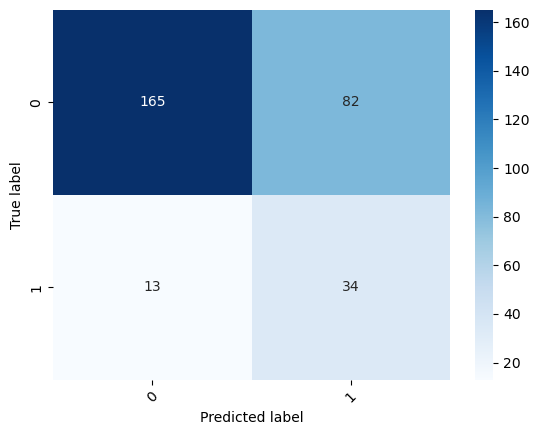

In [108]:
#Running EasyEnsembleClassifier with the best features
X_train_selected = X_train[feature_importances.index[:15]]
X_test_selected = X_test[feature_importances.index[:15]]

model = eec.fit(X_train_selected, y_train)
y_pred = eec.predict(X_test_selected)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_selected)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print(classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Accuracy: 0.7312925170068028
AUC-ROC Score: 0.7453269015419072
AUC-PR Score: 0.41579085814492317
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.72      0.77      0.82      0.75      0.55       247
          1       0.35      0.77      0.72      0.48      0.75      0.56        47

avg / total       0.85      0.73      0.76      0.76      0.75      0.55       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

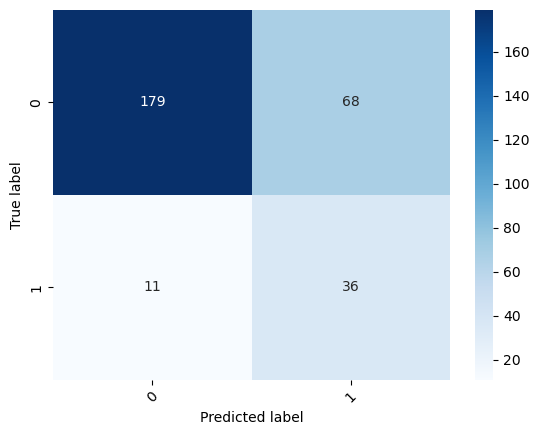

In [109]:
#Getting the best model before the final tests
eec = EasyEnsembleClassifier(n_estimators=250)
model = eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print(classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

To further check if this is the best result we can get from the data that we have, I will convert the model to two dimensions using PCA and see how the classes are distributed and how easy is to distinguish them.

Text(0.5, 1.0, 'PCA of the data')

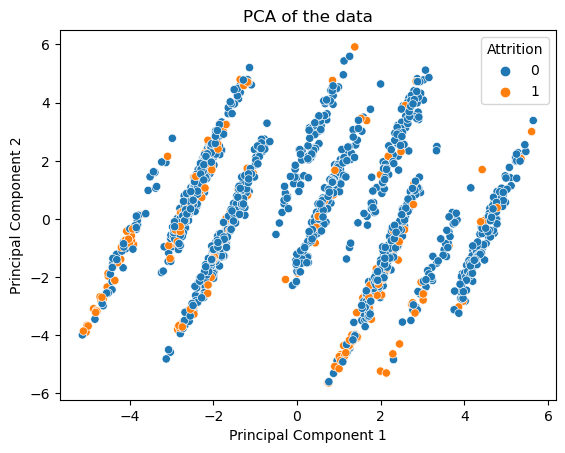

In [110]:
#Applying PCA to the data and plotting it to see how it looks
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the data')

From the PCA plot, we can see that the classes overlap a lot, so it is normal for the model to struggle a little bit to differentiate them. Maybe with more data on employees with attrition we will get better results.

After the test, we can see that the bests results come from Easy Ensemble Classifier running with 250 estimators. Using feature importances to filter the data and try to get better results is not working as expect and returns worse results, so I will stick with the model without the importances.

Now, I will look if the model is overfitting.

## Checking for overfitting

In [111]:
#Running cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.65677966 0.6893617  0.74893617 0.73617021 0.70638298]
0.7075261449693473


There's no big variation from the scores, so we can say that the model is working as expected. Now, I will get the learning curve before saving the model.

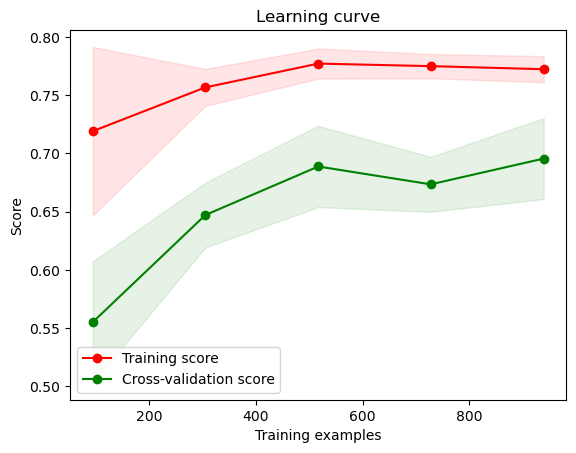

In [112]:
#Plotting the learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc='best')

From the plot, we can see that while the training score remains stable, the cross-validation score keeps improving, showing that the model is not overfitting. With everything done, I will save the model for future deployment and use.

## Saving the model

In [113]:
#Training the model with all the data
model = eec.fit(X,y)

In [114]:
#Saving the model with joblib
import pickle

#Setting up the filenames
model_filename = 'model'
transformer_filename = 'transformer'

#Dumping the model
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

with open(transformer_filename, 'wb') as file:
    pickle.dump(power, file)

#Dumping the label encoder
le_filename = 'label-encoder'
with open(le_filename, 'wb') as file:
    pickle.dump(le, file)

#Dumping the winsorizer
winsorizer_filename = 'winsorizer'
with open(winsorizer_filename, 'wb') as file:
    pickle.dump(winsorizer, file)


## Conclusions

### Analysis Findings

After the analysis, we have found the following:

- The main factors that are causing attrition to our employees are:

    - Employees that rarely travel.

    - The R&D department suffers more attrition than the other departments.

    - Employees that whose education fields are Life Sciences and Medical.

    - The roles at the bottom, as sales executive, research scientist and laboratory technician.

    - Employees that work overtime

    - More attrition in single males than in the rest.

- From those factors, we can say that, employees with low pay rates, that are working overtime and are not travelling as the rest of their colleagues, suffer more from attrition. Sales executives may suffer more from it because the pressure on target achievements and lack of improvement and promotion.

- During the deep analysis using Tableau, we will get more information and prepare a dashboard to show to management and the HR directives, so the company can decide the next steps.


### Model Performance

As the data that we have is imbalanced, we had to use different methods to get the results we wanted. For that, we finally used EasyEnsembleClassifier to train it balancing the data automatically.

The model is putting the recall of positive values before the precission, but our intention is to avoid turnovers, so it is best to maybe misrepresent the negative attrition of an employee as positive if it gives us an advantage in dealing with it in the greater scale.

We can say that the model will perform as expected in finding the employees that will develop attrition and we can use the data to improve the areas that are causing that attrition and avoid loosing good employees to turnovers.

### Next Steps

The next steps will be to create a dashboard using BI tools to explore the data and get more deep insights on it, try to get more information about employees with attrition to lower the class imbalance of the data and further improve the model.